<a href="https://colab.research.google.com/github/dexterashish/house-prices/blob/master/house_prices_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [0]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Feature selection and encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Grid and random search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Metrices
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 250


In [0]:
# load training and testing datasets
train = pd.read_csv('https://raw.githubusercontent.com/dexterashish/house-prices/master/train.csv')

test = pd.read_csv('https://raw.githubusercontent.com/dexterashish/house-prices/master/test.csv')

In [0]:
# Combine datasets
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index'], inplace=True, axis=1)

In [12]:
# Decribing all numerical features
combined.describe()

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [13]:
# Describing all categorical features
combined.describe(include=['O'])

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,198,2919,2837,2837,2840,2839,2838,2919,2919,2919,2918,2919,2919,2918,2918,571,1499,2919,2917,2760,2760,2760,2762,2919,2919,2919,2918,2919,2919,2919,2919,2915,2895,105,2919,2919,10,2919,2919,2919,2918,2919,2917
unique,2,5,4,4,6,6,4,2,9,8,5,5,4,15,16,4,5,6,7,5,3,5,6,6,5,8,4,4,3,5,4,5,4,4,25,3,3,8,6,6,9,2,2
top,Grvl,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,Shed,NAmes,Y,Gd,CompShg,Gable,Normal,WD,Pave,AllPub
freq,120,2425,2606,1904,851,2493,1283,2723,2511,2889,2671,2538,1798,1025,1014,329,744,1308,2717,2654,1230,2604,1723,2874,1493,1471,1492,2622,2778,2133,1859,2265,1742,95,443,2641,4,2876,2310,2402,2525,2907,2916


In [14]:
# Quick look at data
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


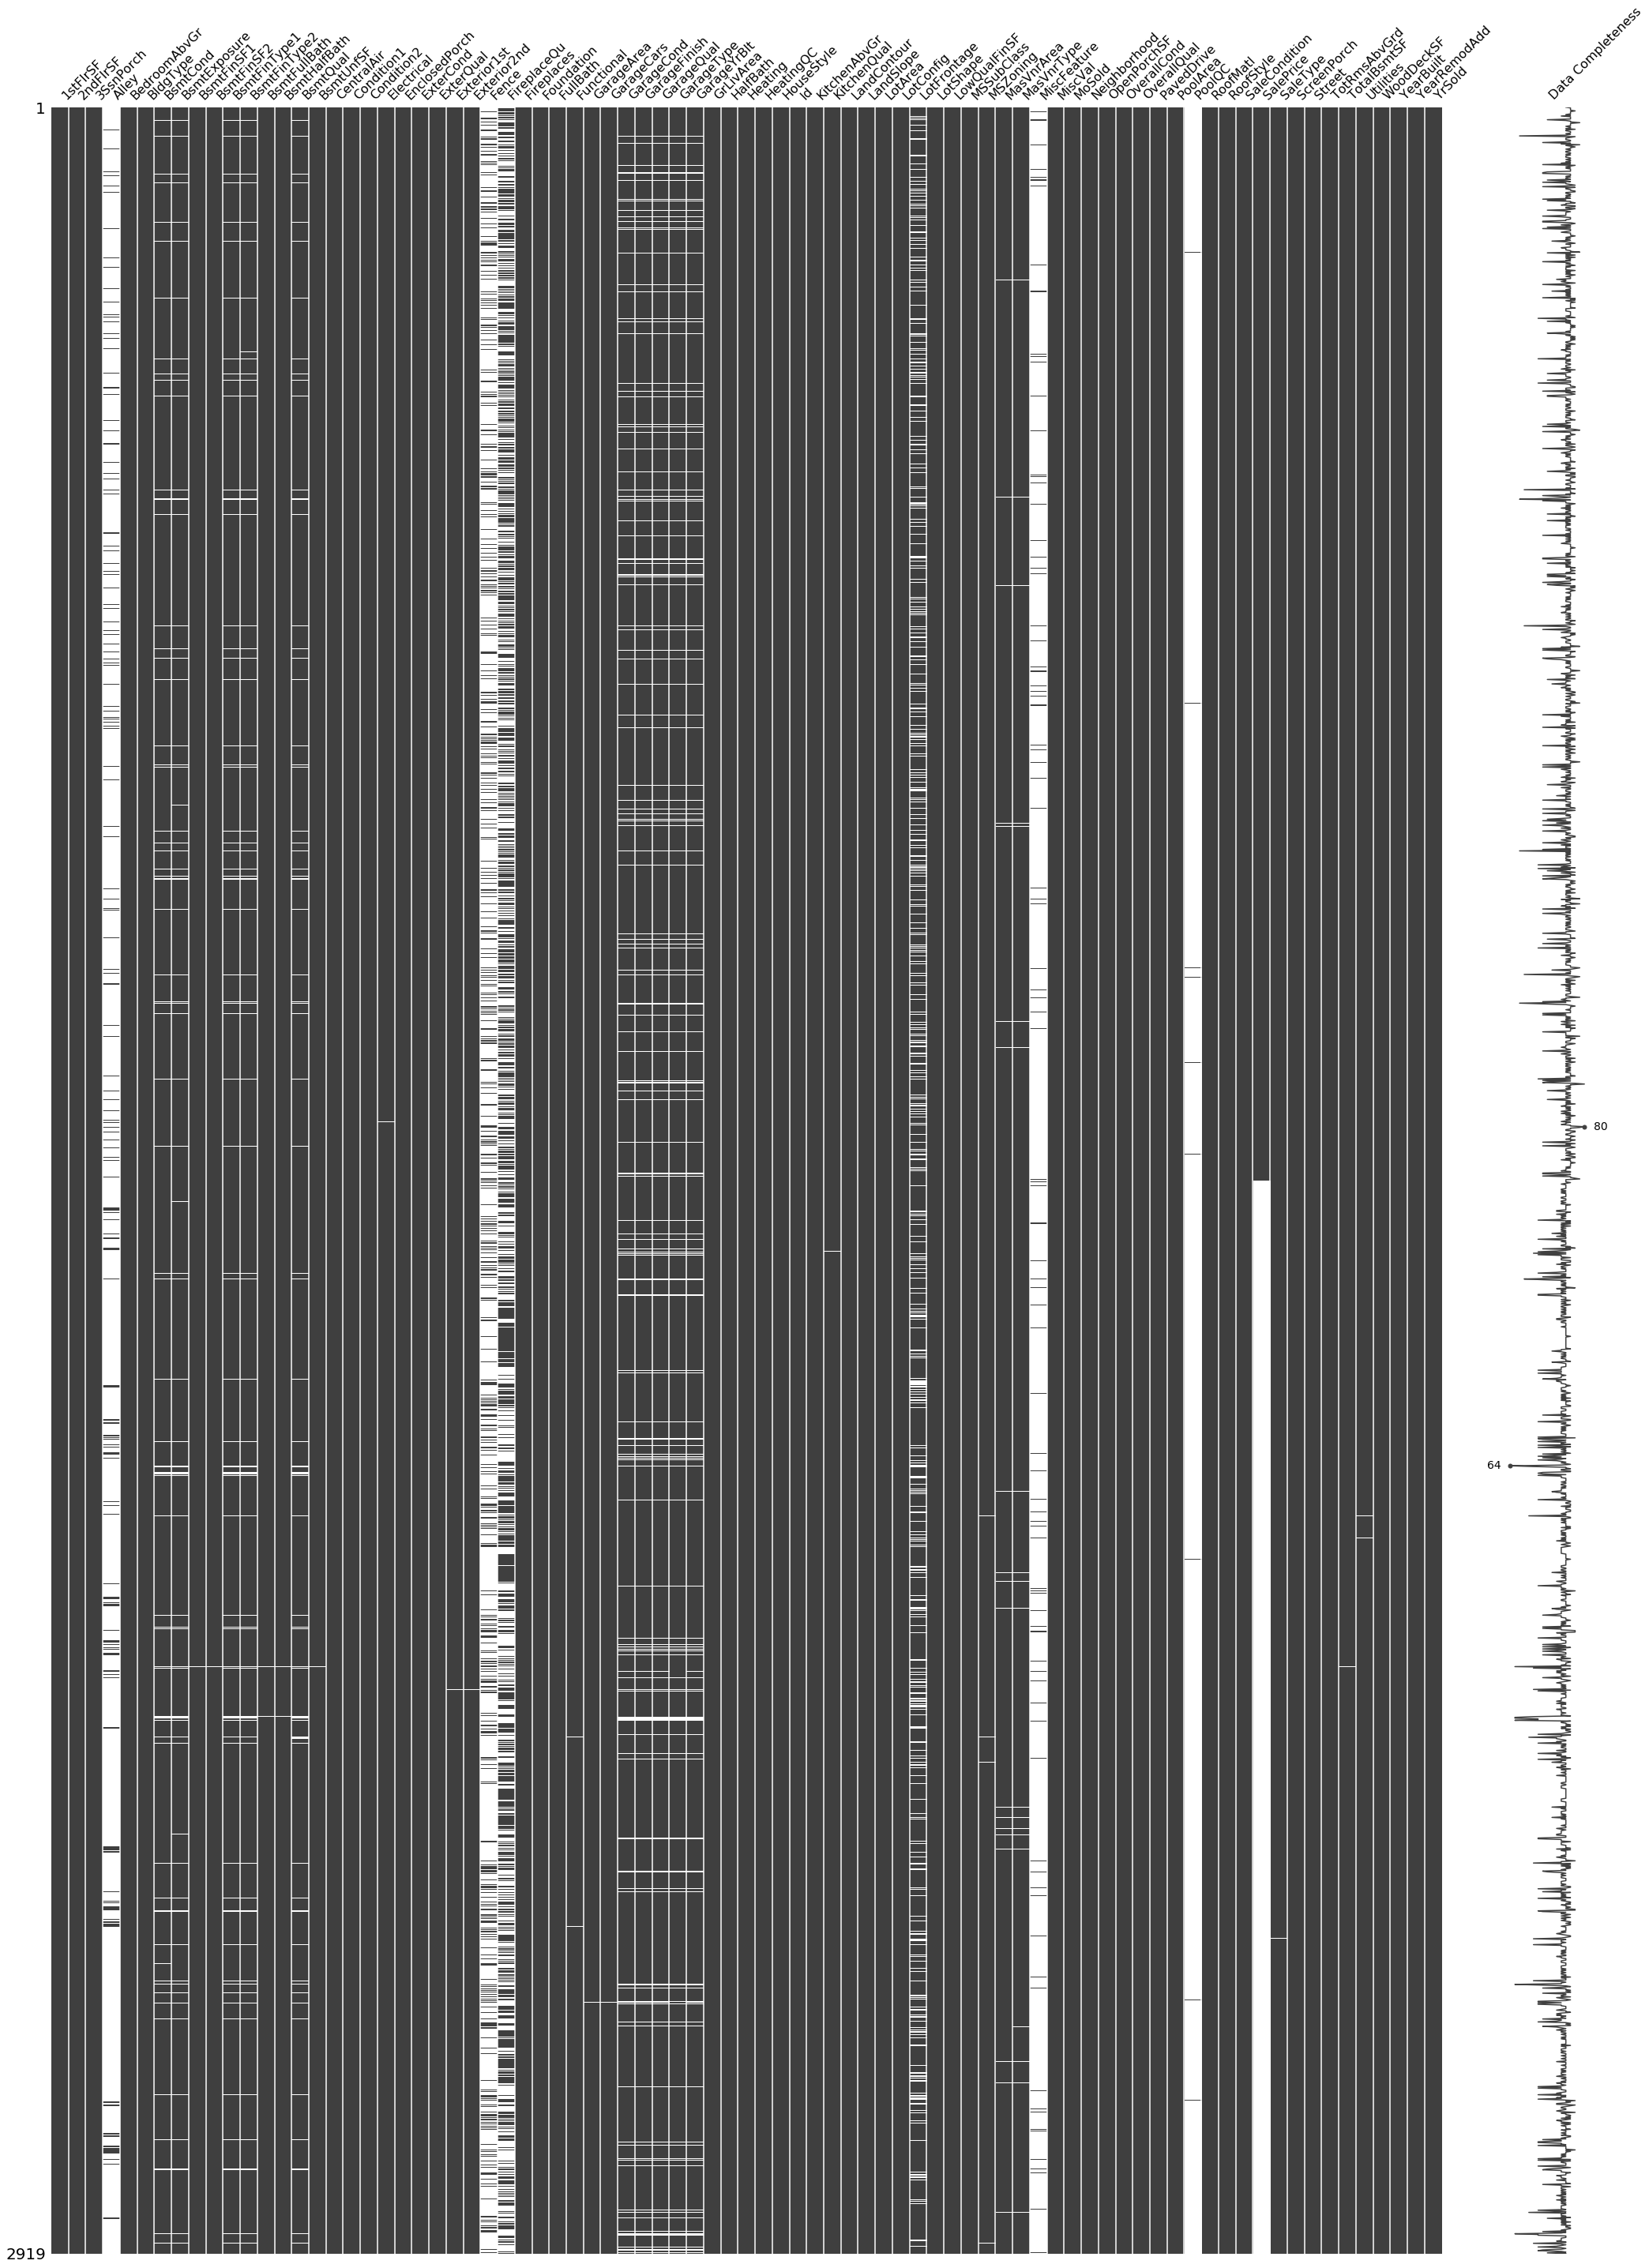

In [15]:
# Check missing values in the dataset
missingno.matrix(combined, figsize=(35,50), labels=True)

In [16]:
combined.shape

(2919, 81)

In [0]:
# Create new datasets for data analysis
combined_bin = pd.DataFrame()  # having discretised continuos variables
combined_con = pd.DataFrame()  # having continuos variables

0


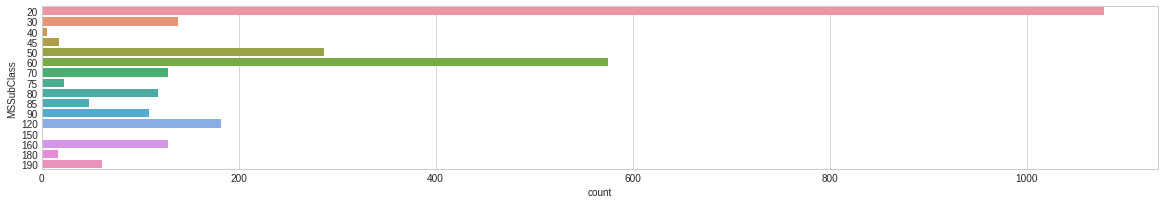

In [18]:
# Feature - MSSubClass
print(combined['MSSubClass'].isnull().sum())
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='MSSubClass', data=combined)

In [0]:
# Too many categories here, let's bucketize some

# First convert MSSubClass into object type column
combined['MSSubClass'] = combined['MSSubClass'].apply(str)

# Create custom buckets
combined.loc[combined['MSSubClass'] == '20', 'MSSubClass']  = '1 Story'
combined.loc[combined['MSSubClass'] == '30', 'MSSubClass']  = '1 Story'
combined.loc[combined['MSSubClass'] == '40', 'MSSubClass']  = '1 Story'
combined.loc[combined['MSSubClass'] == '120', 'MSSubClass'] = '1 Story'
combined.loc[combined['MSSubClass'] == '45', 'MSSubClass']  = '1.5 Story'
combined.loc[combined['MSSubClass'] == '50', 'MSSubClass']  = '1.5 Story'
combined.loc[combined['MSSubClass'] == '150', 'MSSubClass'] = '1.5 Story'
combined.loc[combined['MSSubClass'] == '60', 'MSSubClass'] = '2 Story'
combined.loc[combined['MSSubClass'] == '70', 'MSSubClass'] = '2 Story'
combined.loc[combined['MSSubClass'] == '160', 'MSSubClass'] = '2 Story'
combined.loc[combined['MSSubClass'] == '75', 'MSSubClass'] = '2.5 Story'
combined.loc[combined['MSSubClass'] == '90', 'MSSubClass'] = 'Duplex'
combined.loc[combined['MSSubClass'] == '190', 'MSSubClass'] = 'Duplex'
combined.loc[combined['MSSubClass'] == '80', 'MSSubClass'] = 'Split-multilevel'
combined.loc[combined['MSSubClass'] == '85', 'MSSubClass'] = 'Split-multilevel'
combined.loc[combined['MSSubClass'] == '180', 'MSSubClass'] = 'Split-multilevel'

combined_bin['MSSubClass'] = combined['MSSubClass']
combined_con['MSSubClass'] = combined['MSSubClass']

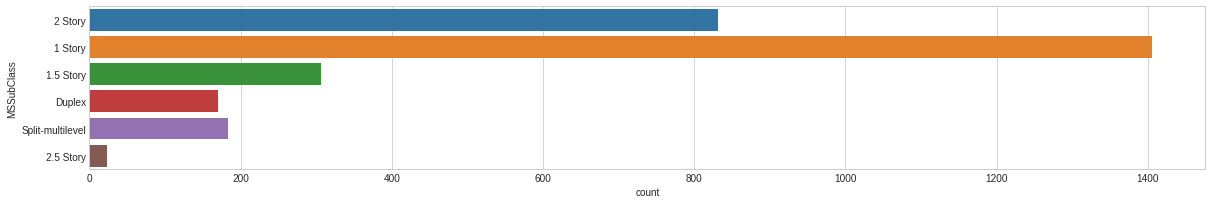

In [20]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='MSSubClass', data=combined)

4


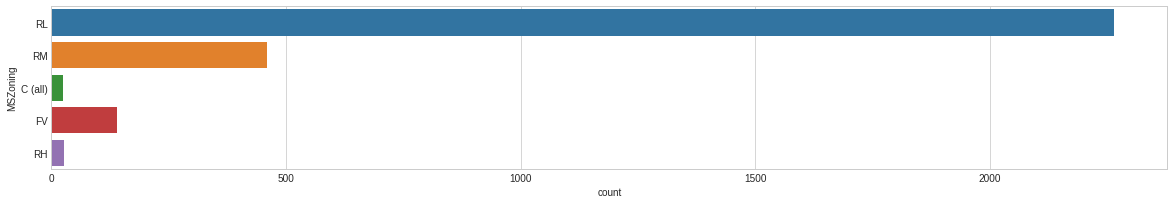

In [21]:
# Feature - MSZoning
print(combined['MSZoning'].isnull().sum())
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='MSZoning', data=combined)

In [22]:
# Bucketize
combined.loc[combined['MSZoning'] == 'A', 'MSZoning'] = 'Agriculture'
combined.loc[combined['MSZoning'] == 'C', 'MSZoning'] = 'Commercial'
combined.loc[combined['MSZoning'] == 'FV', 'MSZoning'] = 'Village residencial'
combined.loc[combined['MSZoning'] == 'I', 'MSZoning'] = 'Industrial'
combined.loc[combined['MSZoning'] == 'RH', 'MSZoning'] = 'Residential'
combined.loc[combined['MSZoning'] == 'RL', 'MSZoning'] = 'Residential'
combined.loc[combined['MSZoning'] == 'RP', 'MSZoning'] = 'Residential'
combined.loc[combined['MSZoning'] == 'RM', 'MSZoning'] = 'Residential'

# fill NA with mode() of all values
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode()[0])
print(combined['MSZoning'].isnull().sum())

combined_bin['MSZoning'] = combined['MSZoning']
combined_con['MSZoning'] = combined['MSZoning']

0


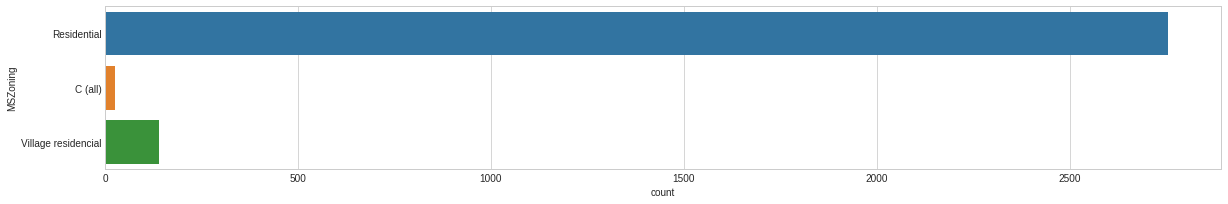

In [23]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='MSZoning', data=combined)

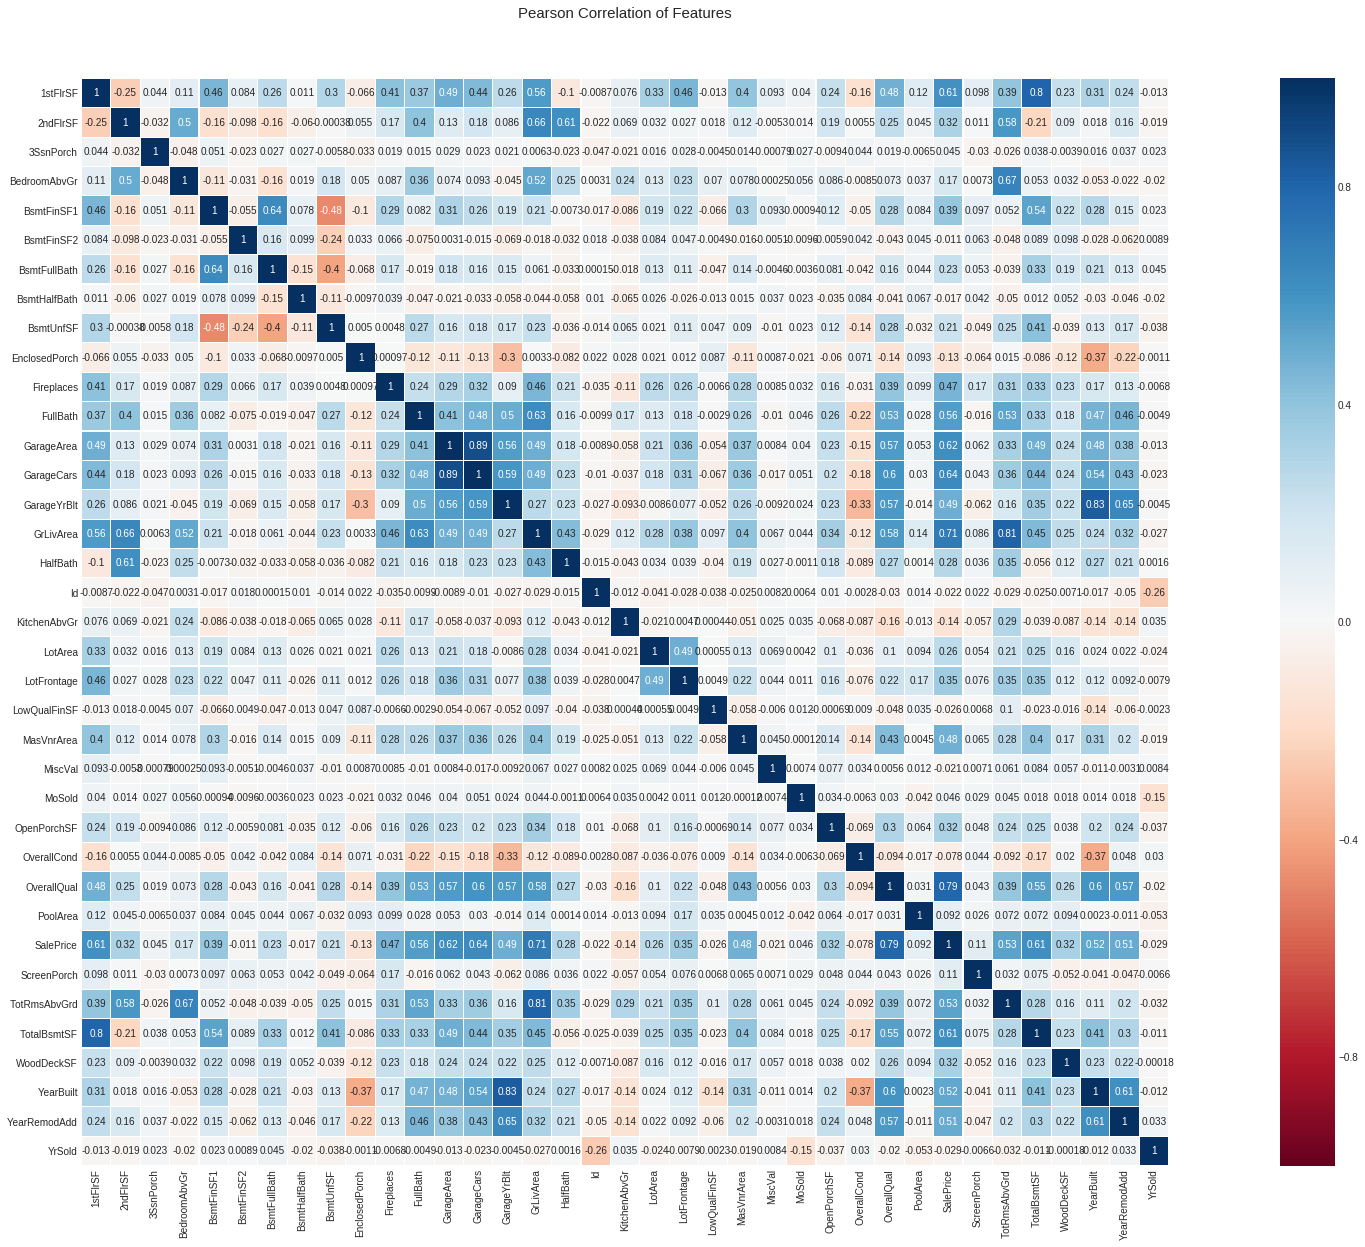

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(40,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(combined.corr(),linewidths=0.1,vmax=1.0,vmin=-1, 
            square=True, linecolor='white', annot=True, cmap=colormap,)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [25]:
# Feature - LotFrontage
print(combined['LotFrontage'].isnull().sum())

486


In [26]:
print(combined['1stFlrSF'].isnull().sum())
print(combined['FullBath'].isnull().sum())
print(combined['GrLivArea'].isnull().sum())
print(combined['LotArea'].isnull().sum())
print(combined['TotRmsAbvGrd'].isnull().sum())
print(combined['TotalBsmtSF'].isnull().sum())
combined['TotalBsmtSF'] = combined['TotalBsmtSF'].fillna(combined['TotalBsmtSF'].median())
print(combined['TotalBsmtSF'].isnull().sum())

data = combined[['1stFlrSF', 'FullBath', 'GrLivArea', 'LotArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'LotFrontage']]

linreg = LinearRegression()

x_train = data[data['LotFrontage'].notnull()].drop(columns='LotFrontage')
y_train = data[data['LotFrontage'].notnull()]['LotFrontage']
x_test = data[data['LotFrontage'].isnull()].drop(columns='LotFrontage')
y_test = data[data['LotFrontage'].isnull()]['LotFrontage']

linreg.fit(x_train, y_train)

#print(x_train.info())
predicted = linreg.predict(x_test)

combined.LotFrontage[combined.LotFrontage.isnull()] = predicted
combined.info()

# Cut to bin the data in equally sized buckets
combined_bin['LotFrontage'] = pd.cut(combined['LotFrontage'], 10)
combined_con['LotFrontage'] = combined['LotFrontage']

0
0
0
0
0
1
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exteri

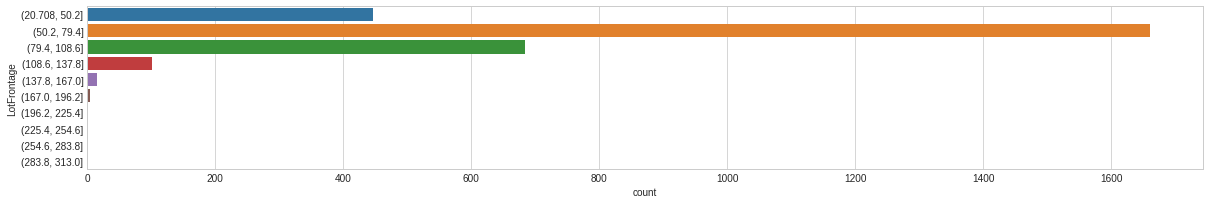

In [27]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LotFrontage', data=combined_bin)

In [28]:
# Feature - LotArea
print(combined['LotArea'].isnull().sum())

0


In [0]:
# Cut to bin the data in equally sized buckets
combined_bin['LotArea'] = pd.cut(combined['LotArea'], 10)
combined_con['LotArea'] = combined['LotArea']

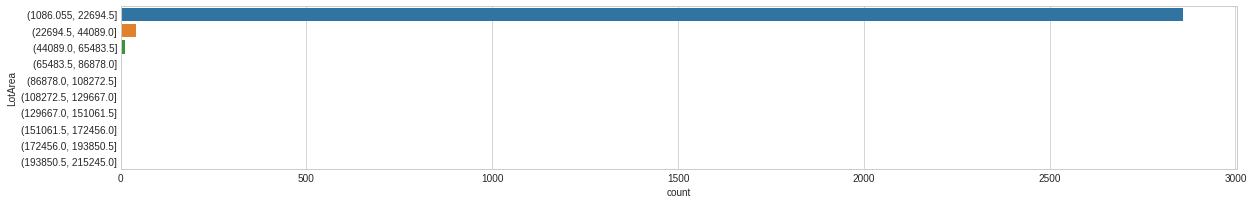

In [30]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LotArea', data=combined_bin)

0


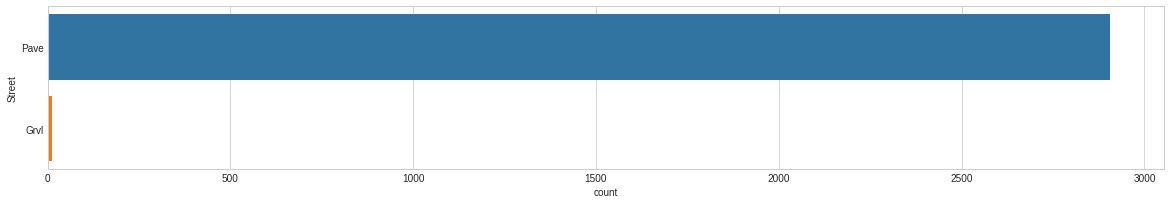

In [31]:
# Feature - Street
print(combined['Street'].isnull().sum())
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Street', data=combined)

In [0]:
combined_bin['Street'] = combined['Street']
combined_con['Street'] = combined['Street']

2721


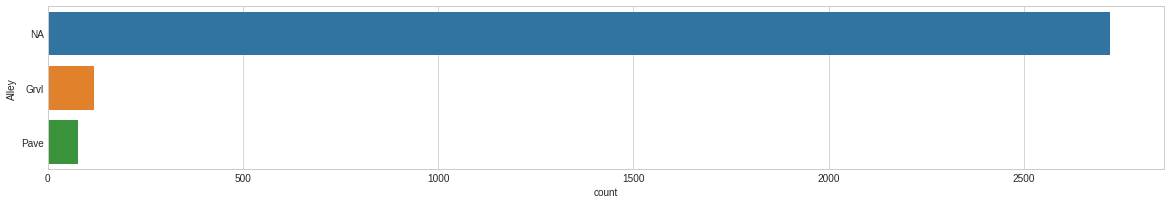

In [33]:
# Feature - Alley
print(combined['Alley'].isnull().sum())
combined['Alley'] = combined.Alley.fillna('NA')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Alley', data=combined)

In [0]:
combined_bin['Alley'] = combined['Alley']
combined_con['Alley'] = combined['Alley']

0


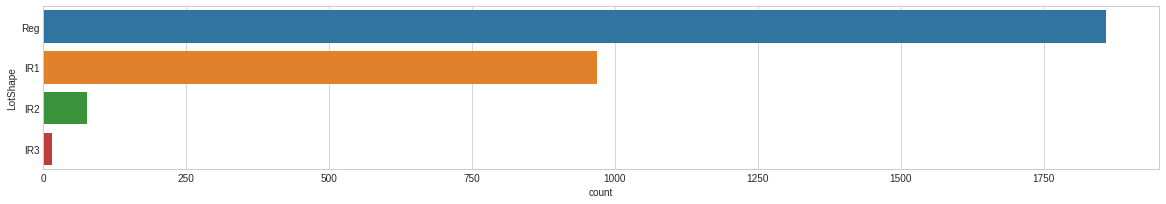

In [35]:
# Feature - LotShape
print(combined['LotShape'].isnull().sum())
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LotShape', data=combined)

In [0]:
combined.loc[combined['LotShape'] == 'Reg', 'LotShape'] = 'Regular'
combined.loc[combined['LotShape'] == 'IR1', 'LotShape'] = 'Irregular'
combined.loc[combined['LotShape'] == 'IR2', 'LotShape'] = 'Irregular'
combined.loc[combined['LotShape'] == 'IR3', 'LotShape'] = 'Irregular'

combined_bin['LotShape'] = combined['LotShape']
combined_con['LotShape'] = combined['LotShape']

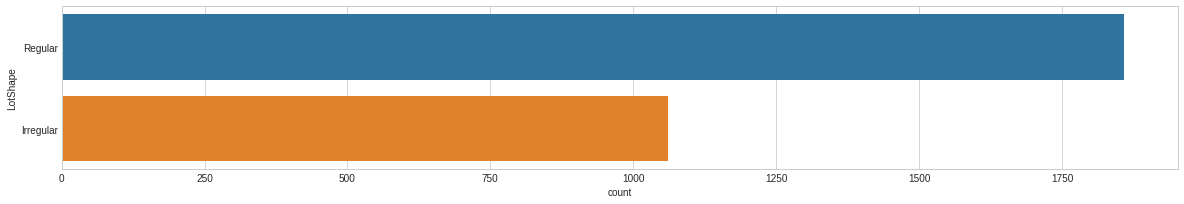

In [37]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LotShape', data=combined)

0


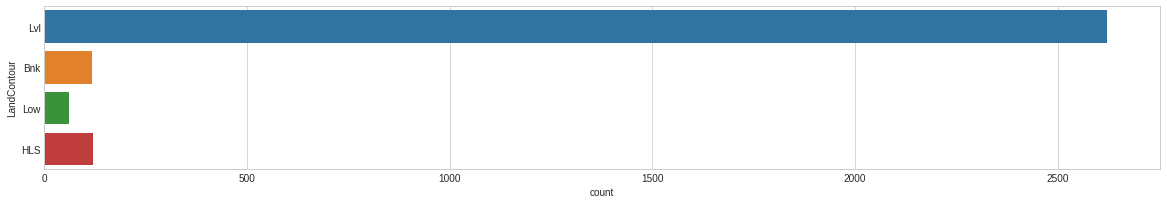

In [38]:
# Feature - LandContour
print(combined['LandContour'].isnull().sum())
#combined['Alley'] = combined.Alley.fillna('NA')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LandContour', data=combined)

In [0]:
combined.loc[combined['LandContour'] == 'Lvl', 'LandContour'] = 'Level'
combined.loc[combined['LandContour'] == 'Bnk', 'LandContour'] = 'Not-level'
combined.loc[combined['LandContour'] == 'HLS', 'LandContour'] = 'Not-level'
combined.loc[combined['LandContour'] == 'Low', 'LandContour'] = 'Not-level'
combined['LandContour'] = combined['LandContour'].map({'Level': 1, 'Not-level': 0})
combined_bin['LandContour'] = combined['LandContour']
combined_con['LandContour'] = combined['LandContour']

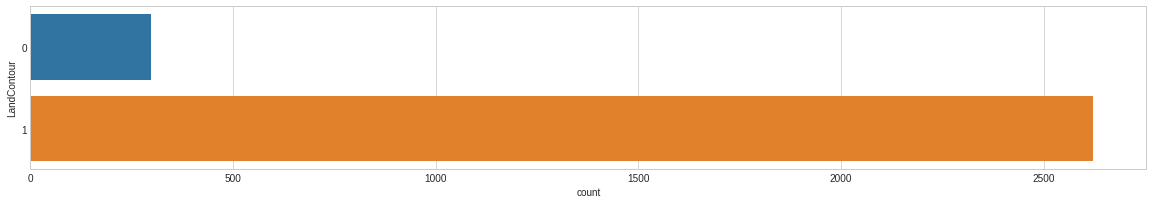

In [40]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LandContour', data=combined)

0


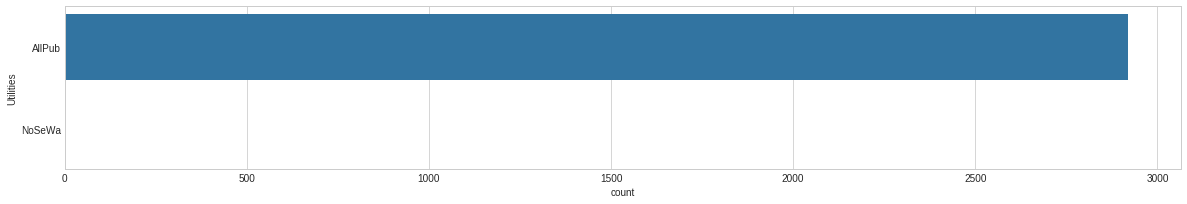

In [41]:
# Feature - Utilities
combined['Utilities'] = combined.Utilities.fillna(combined['Utilities'].mode()[0])
print(combined['Utilities'].isnull().sum())
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Utilities', data=combined)

In [0]:
combined_bin['Utilities'] = combined['Utilities']
combined_con['Utilities'] = combined['Utilities']

0


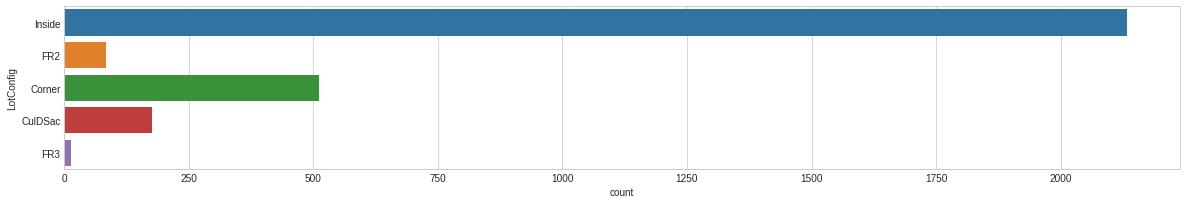

In [43]:
# Feature - LotConfig
print(combined['LotConfig'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LotConfig', data=combined)

In [0]:
combined.loc[combined['LotConfig'] == 'FR2', 'LotConfig'] = 'Frontage'
combined.loc[combined['LotConfig'] == 'FR3', 'LotConfig'] = 'Frontage'

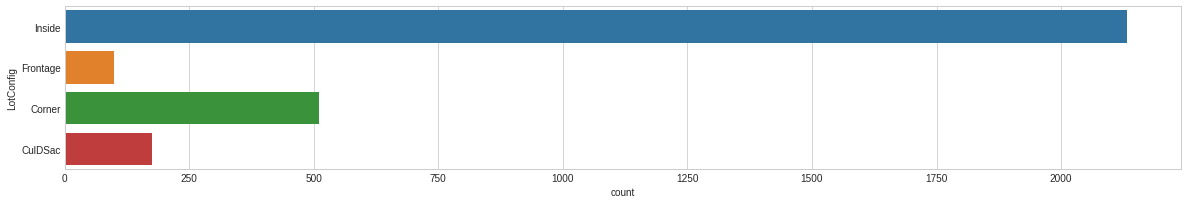

In [45]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LotConfig', data=combined)

In [0]:
combined_bin['LotConfig'] = combined['LotConfig']
combined_con['LotConfig'] = combined['LotConfig']

0


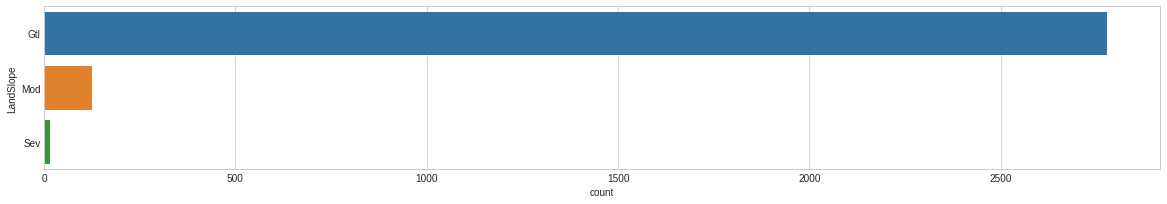

In [47]:
# Feature - LandSlope
print(combined['LandSlope'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LandSlope', data=combined)

In [0]:
combined_bin['LandSlope'] = combined['LandSlope']
combined_con['LandSlope'] = combined['LandSlope']

0


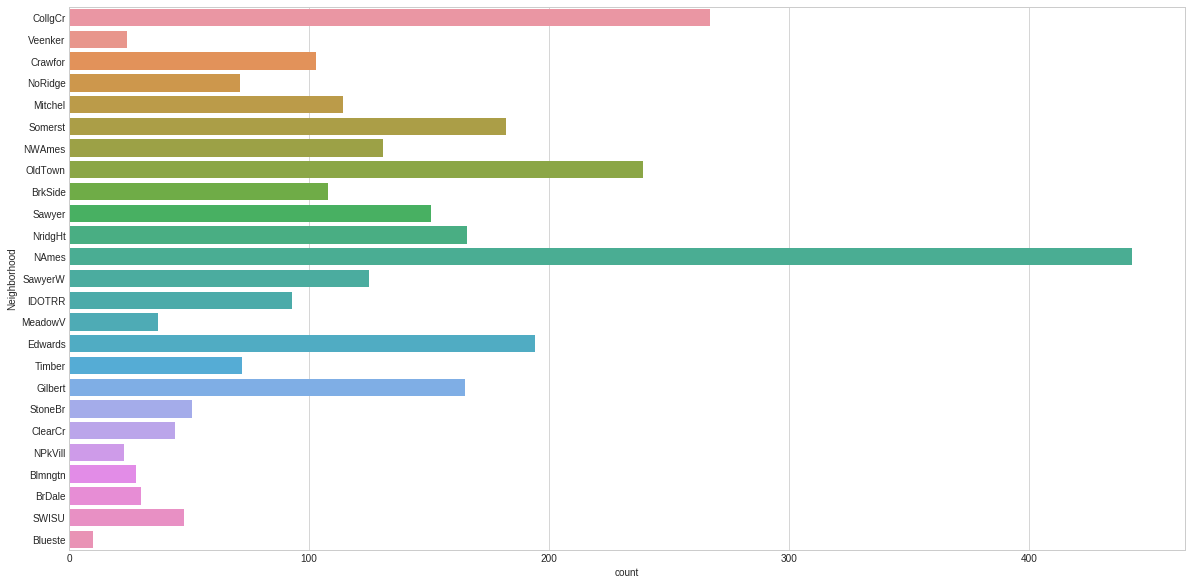

In [49]:
# Feature - Neighborhood
print(combined['Neighborhood'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(y='Neighborhood', data=combined)

In [0]:
combined_bin['Neighborhood'] = combined['Neighborhood']
combined_con['Neighborhood'] = combined['Neighborhood']

0


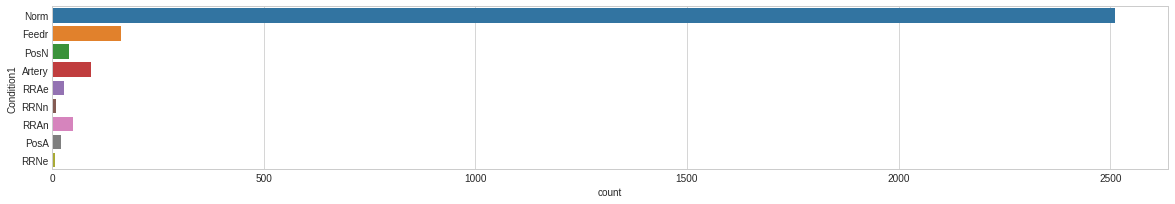

In [51]:
# Feature - Condition1
print(combined['Condition1'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Condition1', data=combined)

In [0]:
combined.loc[combined['Condition1'] == 'RRNn', 'Condition1'] = 'Near North-South Railroad'
combined.loc[combined['Condition1'] == 'RRAn', 'Condition1'] = 'Near North-South Railroad'
combined.loc[combined['Condition1'] == 'PosN', 'Condition1'] = 'Near positive off-site'
combined.loc[combined['Condition1'] == 'PosA', 'Condition1'] = 'Near positive off-site'
combined.loc[combined['Condition1'] == 'RRNe', 'Condition1'] = 'Near East-West Railroad'
combined.loc[combined['Condition1'] == 'RRAe', 'Condition1'] = 'Near East-West Railroad'

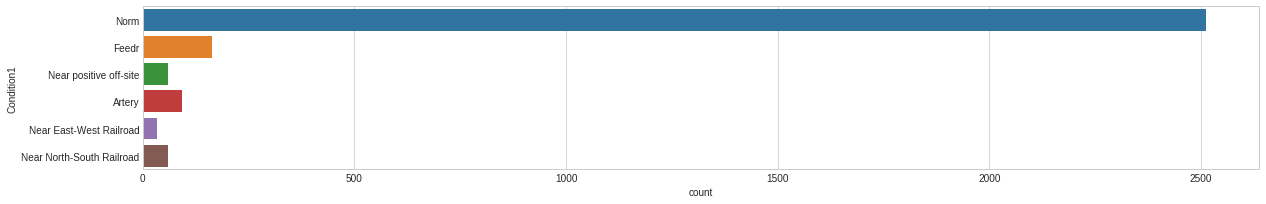

In [53]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Condition1', data=combined)

combined_bin['Condition1'] = combined['Condition1']
combined_con['Condition1'] = combined['Condition1']

0


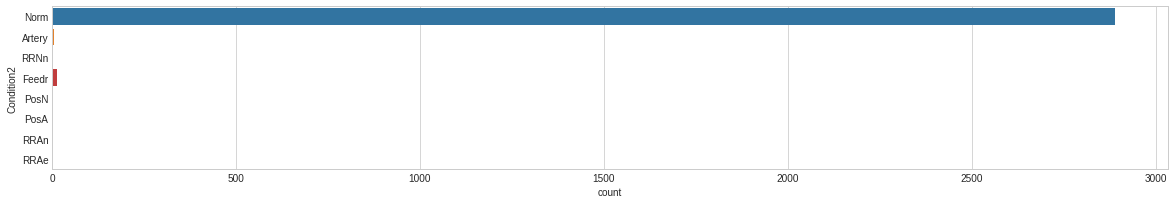

In [54]:
# Feature - Condition2
print(combined['Condition2'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Condition2', data=combined)

In [0]:
combined.loc[combined['Condition2'] == 'RRNn', 'Condition2'] = 'Near North-South Railroad'
combined.loc[combined['Condition2'] == 'RRAn', 'Condition2'] = 'Near North-South Railroad'
combined.loc[combined['Condition2'] == 'PosN', 'Condition2'] = 'Near positive off-site'
combined.loc[combined['Condition2'] == 'PosA', 'Condition2'] = 'Near positive off-site'
combined.loc[combined['Condition2'] == 'RRNe', 'Condition2'] = 'Near East-West Railroad'
combined.loc[combined['Condition2'] == 'RRAe', 'Condition2'] = 'Near East-West Railroad'

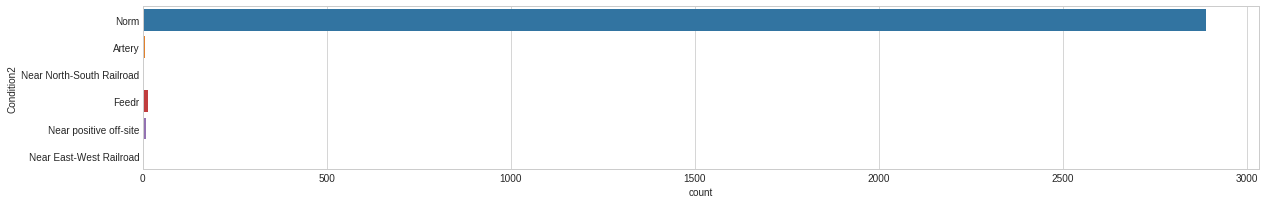

In [56]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Condition2', data=combined)

In [0]:
combined_bin['Condition2'] = combined['Condition2']
combined_con['Condition2'] = combined['Condition2']

0


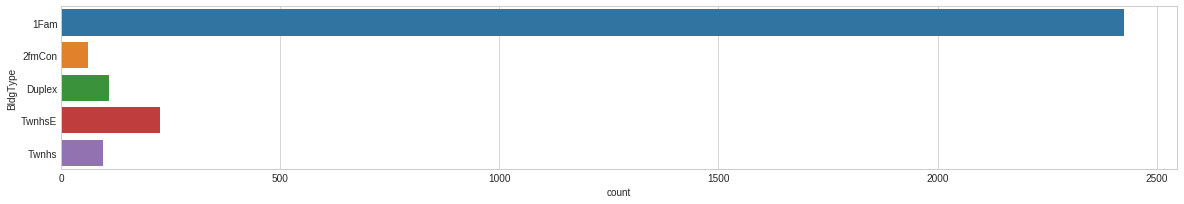

In [58]:
# Feature - BldgType
print(combined['BldgType'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BldgType', data=combined)

In [0]:
combined.loc[combined['BldgType'] == '2fmCon', 'BldgType'] = 'Duplex'
combined.loc[combined['BldgType'] == 'Duplex', 'BldgType'] = 'Duplex'
combined.loc[combined['BldgType'] == 'TwnhsE', 'BldgType'] = 'Townhouse'
combined.loc[combined['BldgType'] == 'Twnhs', 'BldgType'] = 'Townhouse'

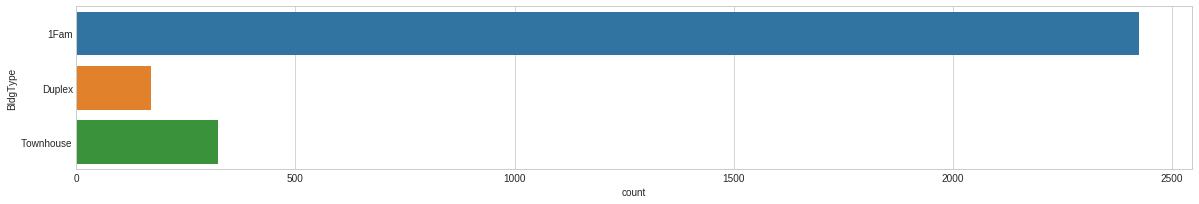

In [60]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BldgType', data=combined)

In [0]:
combined_bin['BldgType'] = combined['BldgType']
combined_con['BldgType'] = combined['BldgType']

0


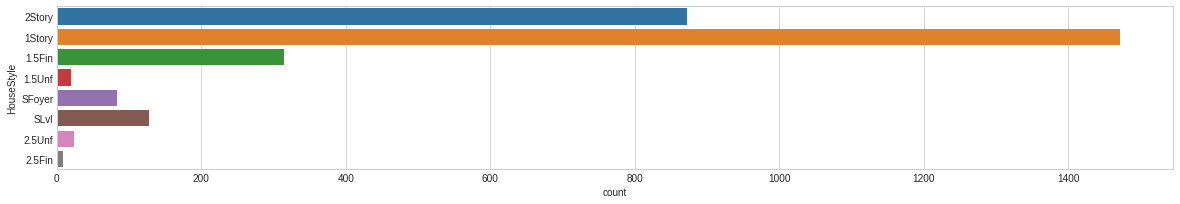

In [62]:
# Feature - HouseStyle
print(combined['HouseStyle'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='HouseStyle', data=combined)

In [0]:
combined.loc[combined['HouseStyle'] == '1.5Fin', 'HouseStyle'] = '1.5 Story'
combined.loc[combined['HouseStyle'] == '1.5Unf', 'HouseStyle'] = '1.5 Story'
combined.loc[combined['HouseStyle'] == '2.5Fin', 'HouseStyle'] = '2.5 Story'
combined.loc[combined['HouseStyle'] == '2.5Unf', 'HouseStyle'] = '2.5 Story'

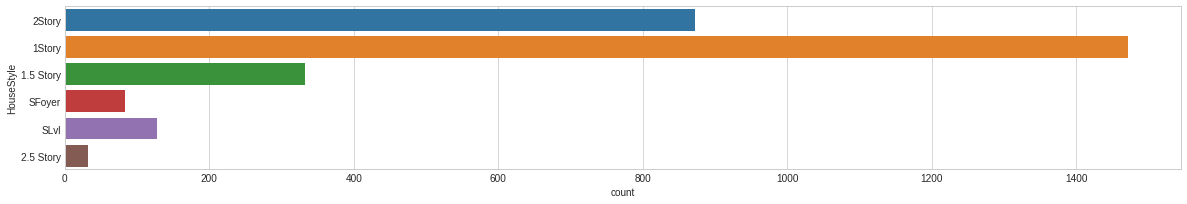

In [64]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='HouseStyle', data=combined)

In [0]:
combined_bin['HouseStyle'] = combined['HouseStyle']
combined_con['HouseStyle'] = combined['HouseStyle']

In [66]:
# Feature - OverallQual
print(combined['OverallQual'].isnull().sum())

combined_bin['OverallQual'] = combined['OverallQual']
combined_con['OverallQual'] = combined['OverallQual']

0


In [67]:
# Feature - OverallCond
print(combined['OverallCond'].isnull().sum())

combined_bin['OverallCond'] = combined['OverallCond']
combined_con['OverallCond'] = combined['OverallCond']

0


0


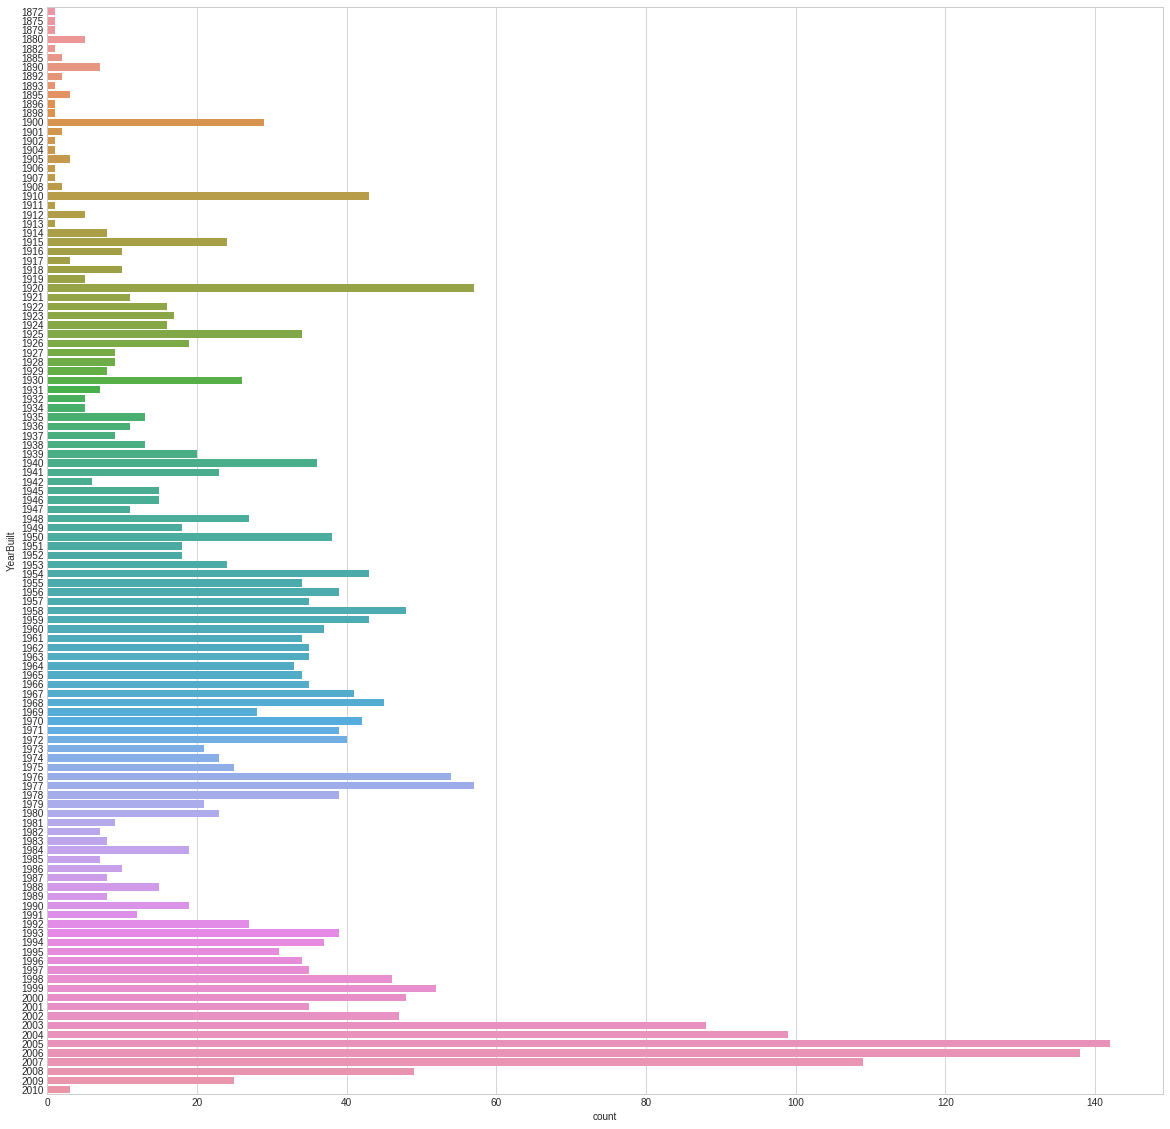

In [68]:
# Feature - YearBuilt
print(combined['YearBuilt'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,20))
sns.countplot(y='YearBuilt', data=combined)

In [0]:
# Cut to bin the data in equally sized buckets
combined_bin['YearBuilt'] = pd.cut(combined['YearBuilt'], 10)
combined_con['YearBuilt'] = combined['YearBuilt']

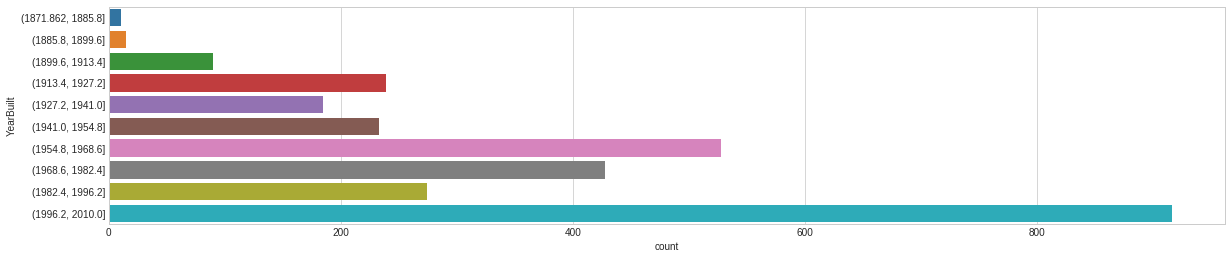

In [70]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,4))
sns.countplot(y='YearBuilt', data=combined_bin)

0


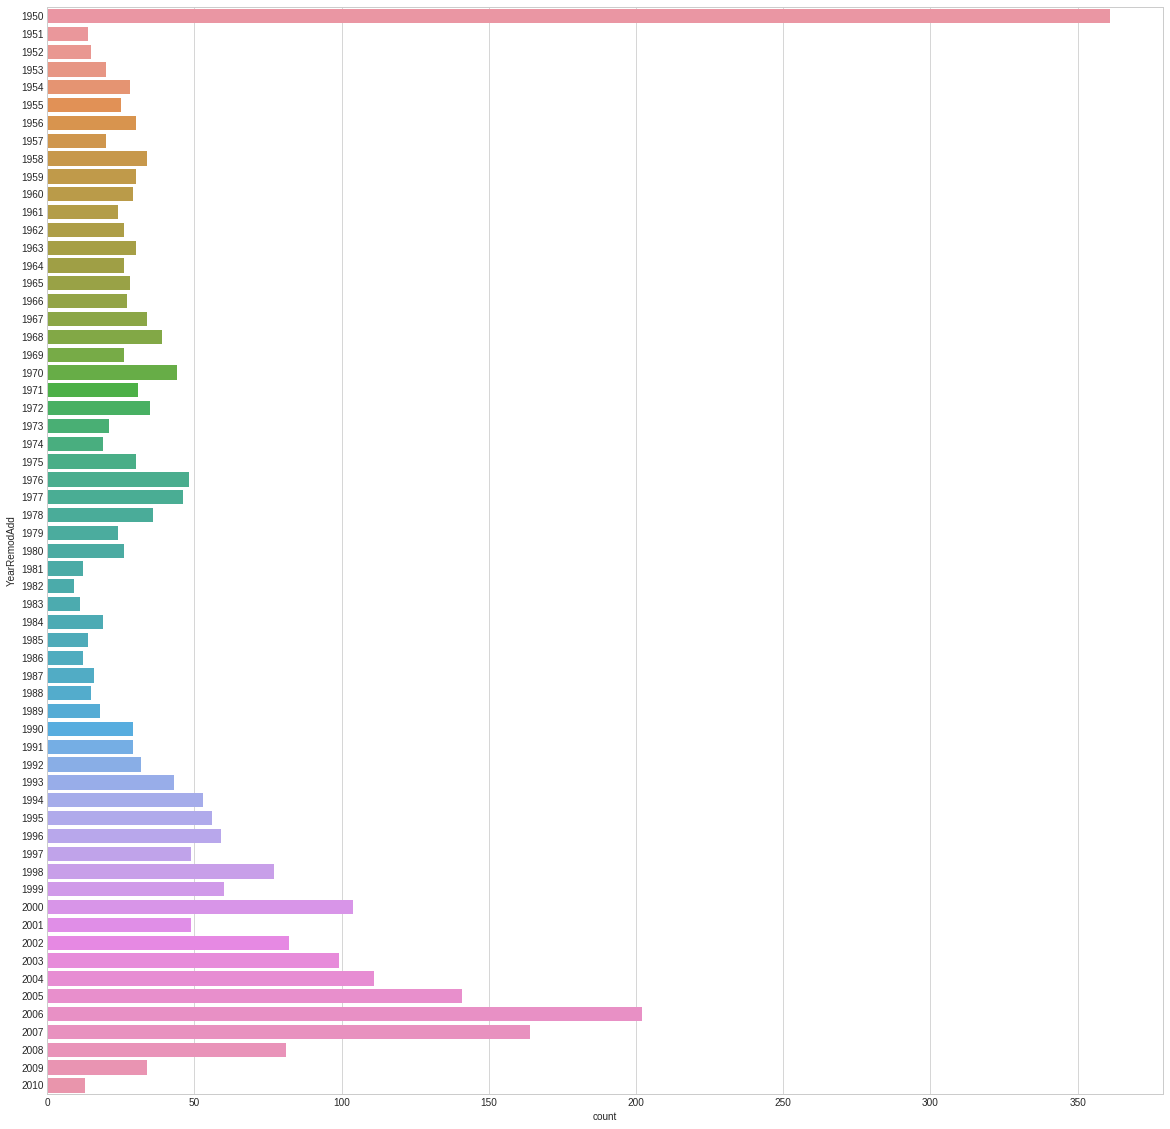

In [71]:
# Feature - YearRemodAdd
print(combined['YearRemodAdd'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,20))
sns.countplot(y='YearRemodAdd', data=combined)

In [0]:
# Cut to bin the data in equally sized buckets
combined_bin['YearRemodAdd'] = pd.cut(combined['YearRemodAdd'], 6)
combined_con['YearRemodAdd'] = combined['YearRemodAdd']

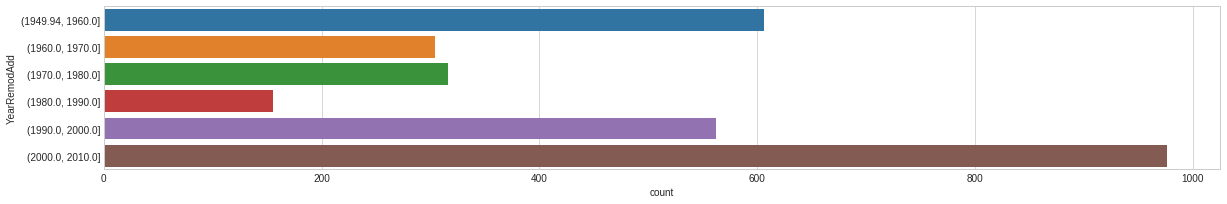

In [73]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='YearRemodAdd', data=combined_bin)

In [74]:
# Feature - RoofStyle
print(combined['RoofStyle'].isnull().sum())

combined_bin['RoofStyle'] = combined['RoofStyle']
combined_con['RoofStyle'] = combined['RoofStyle']

0


0


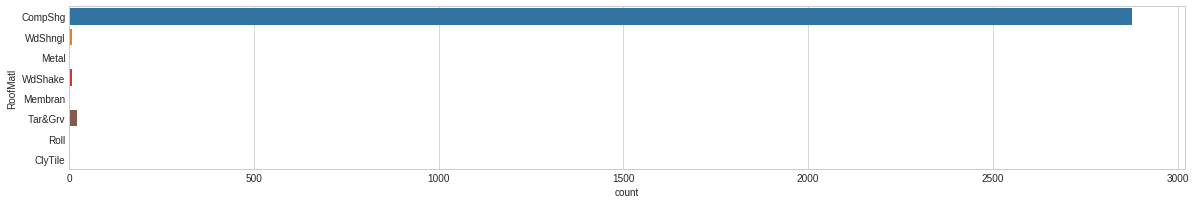

In [75]:
# Feature - RoofMatl
print(combined['RoofMatl'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='RoofMatl', data=combined)

In [0]:
combined_bin['RoofMatl'] = combined['RoofMatl']
combined_con['RoofMatl'] = combined['RoofMatl']

0


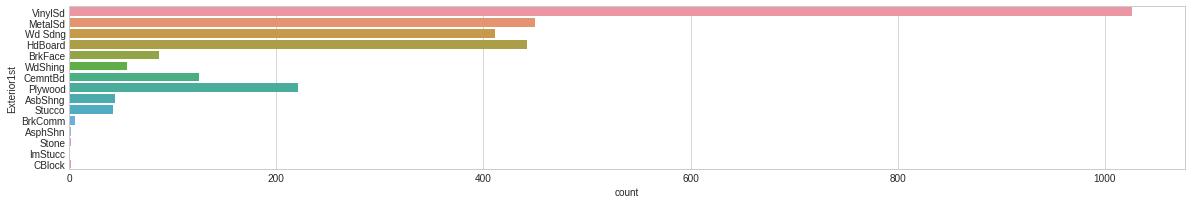

In [77]:
# Feature - Exterior1st
combined['Exterior1st'] = combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
print(combined['Exterior1st'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Exterior1st', data=combined)

In [0]:
combined_bin['Exterior1st'] = combined['Exterior1st']
combined_con['Exterior1st'] = combined['Exterior1st']

0


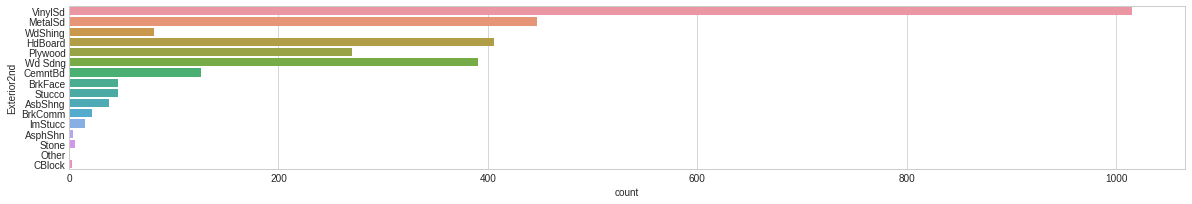

In [79]:
# Feature - Exterior2nd
combined['Exterior2nd'] = combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])
print(combined['Exterior2nd'].isnull().sum())

combined['Exterior2nd'] = combined['Exterior2nd'].replace('Wd Shng', 'WdShing')
combined['Exterior2nd'] = combined['Exterior2nd'].replace('Brk Cmn', 'BrkComm')
combined['Exterior2nd'] = combined['Exterior2nd'].replace('CmentBd', 'CemntBd')

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Exterior2nd', data=combined)

In [0]:
combined_bin['Exterior2nd'] = combined['Exterior2nd']
combined_con['Exterior2nd'] = combined['Exterior2nd']

24


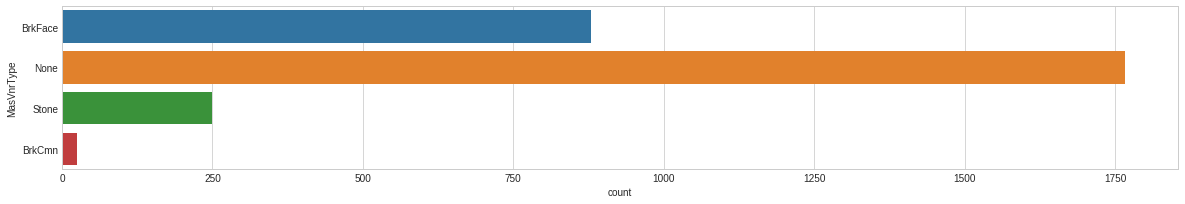

In [81]:
# Feature - MasVnrType
print(combined['MasVnrType'].isnull().sum())

combined['MasVnrType'] = combined['MasVnrType'].fillna(combined['MasVnrType'].mode()[0])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='MasVnrType', data=combined)

In [0]:
combined.loc[combined['MasVnrType'] == 'BrkCmn', 'MasVnrType'] = 'Brick'
combined.loc[combined['MasVnrType'] == 'BrkFace', 'MasVnrType'] = 'Brick'

In [0]:
combined_bin['MasVnrType'] = combined['MasVnrType']
combined_con['MasVnrType'] = combined['MasVnrType']

In [84]:
# Feature - MasVnrArea

data = combined[['1stFlrSF', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'MasVnrArea']]

linreg = LinearRegression()

x_train = data[data['MasVnrArea'].notnull()].drop(columns='MasVnrArea')
y_train = data[data['MasVnrArea'].notnull()]['MasVnrArea']
x_test = data[data['MasVnrArea'].isnull()].drop(columns='MasVnrArea')
y_test = data[data['MasVnrArea'].isnull()]['MasVnrArea']

linreg.fit(x_train, y_train)

#print(x_train.info())
predicted = linreg.predict(x_test)

combined.MasVnrArea[combined.MasVnrArea.isnull()] = predicted
combined.info()

print(combined['MasVnrArea'].isnull().sum())

combined['MasVnrArea'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

count    2919.000000
mean      102.636152
std       178.789530
min         0.000000
25%         0.000000
50%         0.000000
75%       165.128504
max      1600.000000
Name: MasVnrArea, dtype: float64

In [0]:
# Cut to bin the data in equally sized buckets
combined_bin['MasVnrArea'] = pd.cut(combined['MasVnrArea'], 10, include_lowest=True)
combined_con['MasVnrArea'] = combined['MasVnrArea']

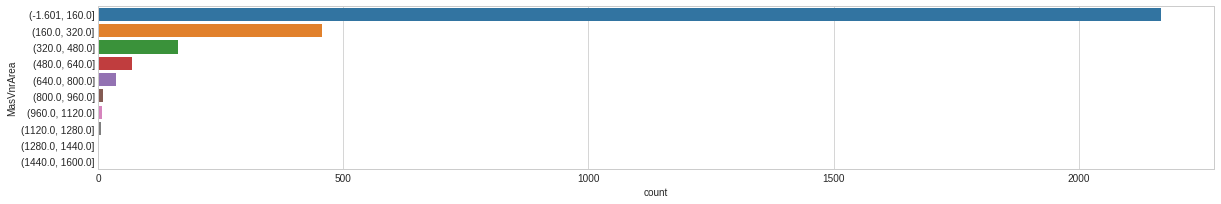

In [86]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='MasVnrArea', data=combined_bin)

0


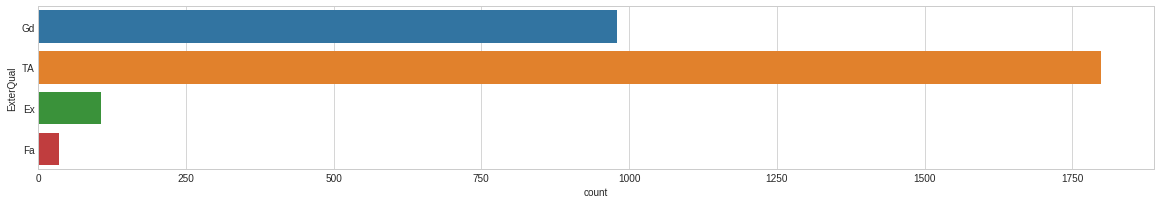

In [87]:
# Feature - ExterQual
print(combined['ExterQual'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='ExterQual', data=combined)

In [0]:
combined_bin['ExterQual'] = combined['ExterQual']
combined_con['ExterQual'] = combined['ExterQual']

0


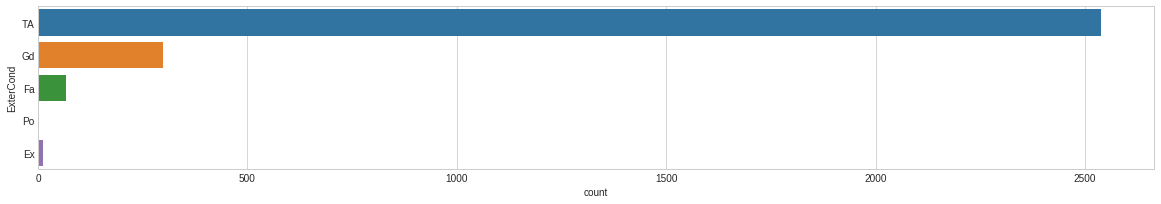

In [89]:
# Feature - ExterCond
print(combined['ExterCond'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='ExterCond', data=combined)

In [0]:
combined_bin['ExterCond'] = combined['ExterCond']
combined_con['ExterCond'] = combined['ExterCond']

In [91]:
# Feature - Foundation
print(combined['Foundation'].isnull().sum())

combined_bin['Foundation'] = combined['Foundation']
combined_con['Foundation'] = combined['Foundation']

0


0


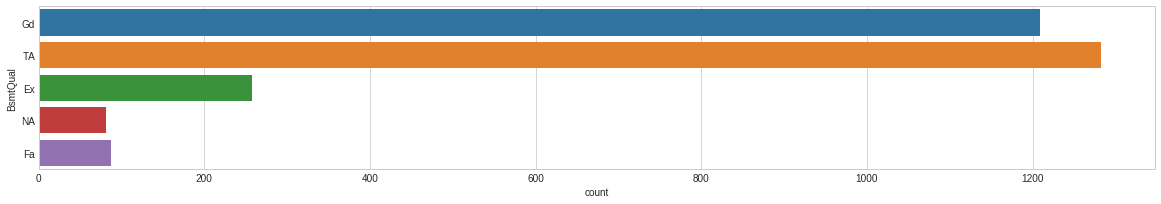

In [92]:
# Feature - BsmtQual
combined['BsmtQual'] = combined['BsmtQual'].fillna('NA') 
print(combined['BsmtQual'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BsmtQual', data=combined)

In [0]:
combined_bin['BsmtQual'] = combined['BsmtQual']
combined_con['BsmtQual'] = combined['BsmtQual']

In [94]:
# Feature - BsmtCond
combined['BsmtCond'] = combined['BsmtCond'].fillna('NA') 
print(combined['BsmtCond'].isnull().sum())

combined_bin['BsmtCond'] = combined['BsmtCond']
combined_con['BsmtCond'] = combined['BsmtCond']

0


In [95]:
# Feature - BsmtExposure
combined['BsmtExposure'] = combined['BsmtExposure'].fillna('NA') 
print(combined['BsmtExposure'].isnull().sum())

combined_bin['BsmtExposure'] = combined['BsmtExposure']
combined_con['BsmtExposure'] = combined['BsmtExposure']

0


0


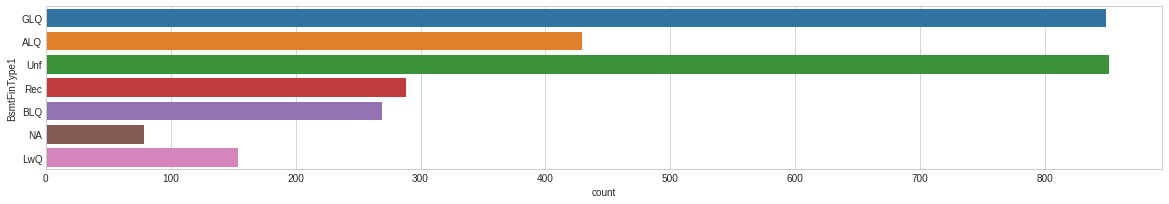

In [96]:
# Feature - BsmtFinType1
combined['BsmtFinType1'] = combined['BsmtFinType1'].fillna('NA') 
print(combined['BsmtFinType1'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BsmtFinType1', data=combined)

In [0]:
combined_bin['BsmtFinType1'] = combined['BsmtFinType1']
combined_con['BsmtFinType1'] = combined['BsmtFinType1']

In [98]:
# Feature - BsmtFinSF1
combined['BsmtFinSF1'] = combined['BsmtFinSF1'].fillna(combined['BsmtFinSF1'].median()) 
print(combined['BsmtFinSF1'].isnull().sum())

combined['BsmtFinSF1'].describe()

0


count    2919.000000
mean      441.398253
std       455.534750
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [0]:
combined_bin['BsmtFinSF1'] = pd.cut(combined['BsmtFinSF1'], 10)
combined_con['BsmtFinSF1'] = combined['BsmtFinSF1']

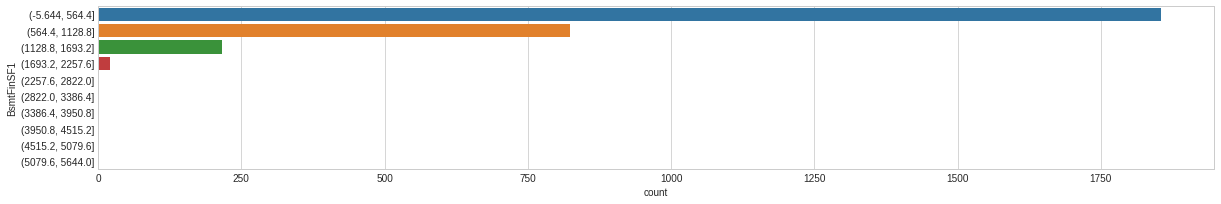

In [100]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BsmtFinSF1', data=combined_bin)

In [101]:
# Feature - BsmtFinType2
print(combined['BsmtFinType2'].isnull().sum())
combined['BsmtFinType2'] = combined['BsmtFinType2'].fillna('NA') 

combined_bin['BsmtFinType2'] = combined['BsmtFinType2']
combined_con['BsmtFinType2'] = combined['BsmtFinType2']

80


In [102]:
# Feature - BsmtFinSF2
combined['BsmtFinSF2'] = combined['BsmtFinSF2'].fillna(combined['BsmtFinSF2'].median()) 
print(combined['BsmtFinSF2'].isnull().sum())

combined_bin['BsmtFinSF2'] = pd.cut(combined['BsmtFinSF2'], 10)
combined_con['BsmtFinSF2'] = combined['BsmtFinSF2']

0


In [103]:
# Feature - BsmtUnfSF
combined['BsmtUnfSF'] = combined['BsmtUnfSF'].fillna(combined['BsmtUnfSF'].median()) 
print(combined['BsmtUnfSF'].isnull().sum())

combined_bin['BsmtUnfSF'] = pd.cut(combined['BsmtUnfSF'], 10)
combined_con['BsmtUnfSF'] = combined['BsmtUnfSF']

0


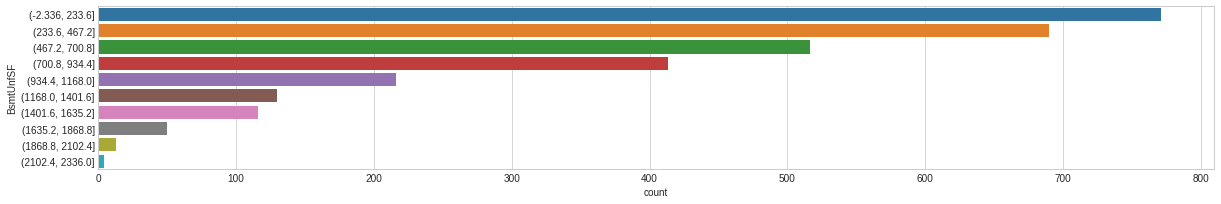

In [104]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BsmtUnfSF', data=combined_bin)

In [105]:
# Feature - TotalBsmtSF
print(combined['TotalBsmtSF'].isnull().sum())

combined_bin['TotalBsmtSF'] = pd.cut(combined['TotalBsmtSF'], 10)
combined_con['TotalBsmtSF'] = combined['TotalBsmtSF']

0


0


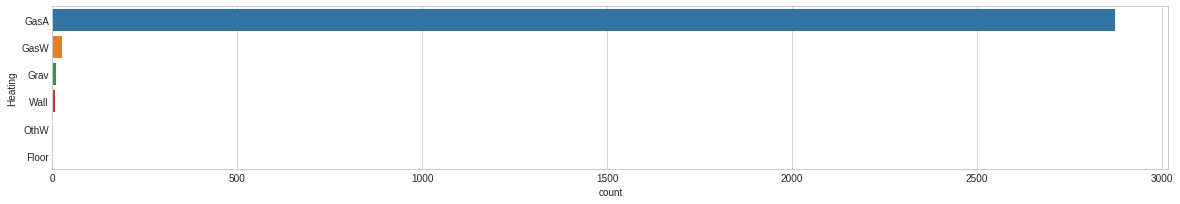

In [106]:
# Feature - Heating
print(combined['Heating'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Heating', data=combined)

In [0]:
combined.loc[combined['Heating'] == 'GasA', 'Heating'] = 'Gas based'
combined.loc[combined['Heating'] == 'GasW', 'Heating'] = 'Gas based'

In [0]:
combined_bin['Heating'] = combined['Heating']
combined_con['Heating'] = combined['Heating']

In [109]:
# Feature - HeatingQC
print(combined['HeatingQC'].isnull().sum())

combined_bin['HeatingQC'] = combined['HeatingQC']
combined_con['HeatingQC'] = combined['HeatingQC']

0


In [110]:
# Feature - CentralAir
print(combined['CentralAir'].isnull().sum())

combined['CentralAir'] = combined['CentralAir'].map({'N':0,'Y':1}).astype(int)

0


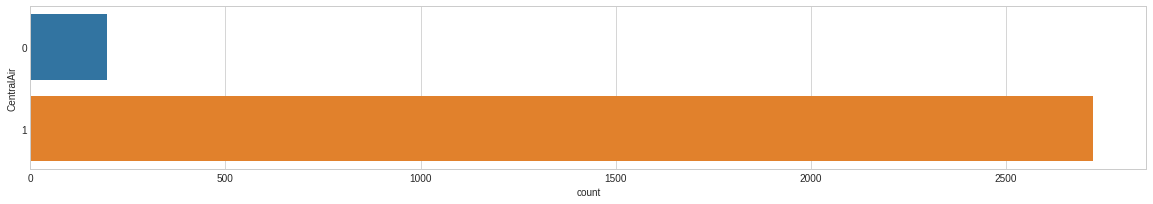

In [111]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='CentralAir', data=combined)

In [0]:
combined_bin['CentralAir'] = combined['CentralAir']
combined_con['CentralAir'] = combined['CentralAir']

In [113]:
# Feature - Electrical
combined['Electrical'] = combined['Electrical'].fillna(combined['Electrical'].mode()[0]) 
print(combined['Electrical'].isnull().sum())

combined_bin['Electrical'] = combined['Electrical']
combined_con['Electrical'] = combined['Electrical']

0


In [114]:
# Feature - 1stFlrSF
print(combined['1stFlrSF'].isnull().sum())

combined['1stFlrSF'].describe()


0


count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

In [0]:
combined_bin['1stFlrSF'] = pd.cut(combined['1stFlrSF'], 10)
combined_con['1stFlrSF'] = combined['1stFlrSF']

In [116]:
# Feature - 2ndFlrSF
print(combined['2ndFlrSF'].isnull().sum())

combined_bin['2ndFlrSF'] = pd.cut(combined['2ndFlrSF'], 10)
combined_con['2ndFlrSF'] = combined['2ndFlrSF']

0


In [117]:
# Feature - LowQualFinSF
print(combined['LowQualFinSF'].isnull().sum())

combined_bin['LowQualFinSF'] = pd.cut(combined['LowQualFinSF'], 10)
combined_con['LowQualFinSF'] = combined['LowQualFinSF']

0


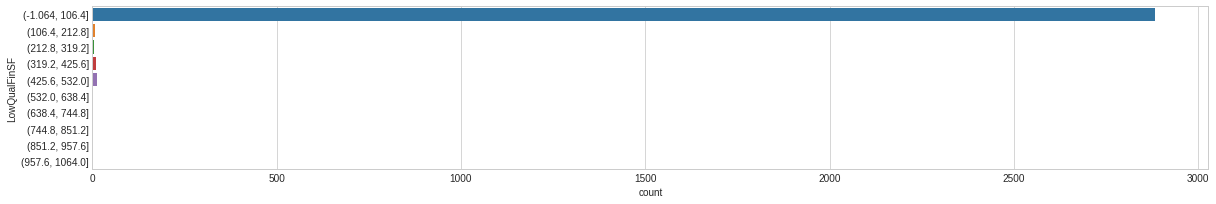

In [118]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='LowQualFinSF', data=combined_bin)

In [119]:
# Feature - GrLivArea
print(combined['GrLivArea'].isnull().sum())

combined_bin['GrLivArea'] = pd.cut(combined['GrLivArea'], 10)
combined_con['GrLivArea'] = combined['GrLivArea']

0


0


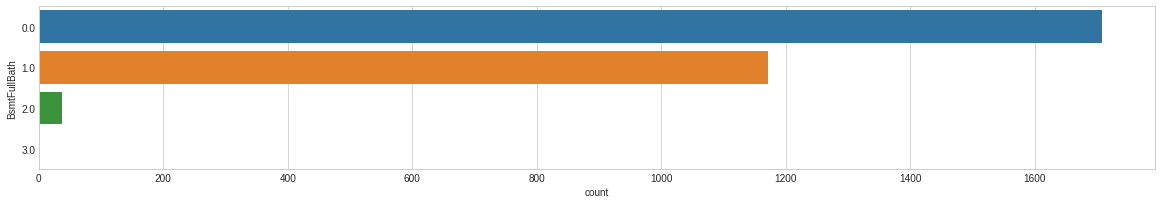

In [120]:
# Feature - BsmtFullBath
combined['BsmtFullBath'] = combined['BsmtFullBath'].fillna(combined['BsmtFullBath'].median())
print(combined['BsmtFullBath'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='BsmtFullBath', data=combined)

In [0]:
combined_bin['BsmtFullBath'] = combined['BsmtFullBath']
combined_con['BsmtFullBath'] = combined['BsmtFullBath']

In [122]:
# Feature - BsmtHalfBath
combined['BsmtHalfBath'] = combined['BsmtHalfBath'].fillna(combined['BsmtHalfBath'].median())
print(combined['BsmtHalfBath'].isnull().sum())

combined_bin['BsmtHalfBath'] = combined['BsmtHalfBath']
combined_con['BsmtHalfBath'] = combined['BsmtHalfBath']

0


In [123]:
# Feature - FullBath
print(combined['FullBath'].isnull().sum())

combined_bin['FullBath'] = combined['FullBath']
combined_con['FullBath'] = combined['FullBath']

0


In [124]:
# Feature - FullBath
print(combined['HalfBath'].isnull().sum())

combined_bin['HalfBath'] = combined['HalfBath']
combined_con['HalfBath'] = combined['HalfBath']

0


In [125]:
# Feature - BedroomAbvGr
print(combined['BedroomAbvGr'].isnull().sum())

combined_bin['BedroomAbvGr'] = combined['BedroomAbvGr']
combined_con['BedroomAbvGr'] = combined['BedroomAbvGr']

0


In [126]:
# Feature - KitchenAbvGr
print(combined['KitchenAbvGr'].isnull().sum())

combined_bin['KitchenAbvGr'] = combined['KitchenAbvGr']
combined_con['KitchenAbvGr'] = combined['KitchenAbvGr']

0


In [127]:
# Feature - KitchenQual
combined['KitchenQual'] = combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])
print(combined['KitchenQual'].isnull().sum())

combined_bin['KitchenQual'] = combined['KitchenQual']
combined_con['KitchenQual'] = combined['KitchenQual']

0


In [128]:
# Feature - TotRmsAbvGrd
print(combined['TotRmsAbvGrd'].isnull().sum())

combined_bin['TotRmsAbvGrd'] = combined['TotRmsAbvGrd']
combined_con['TotRmsAbvGrd'] = combined['TotRmsAbvGrd']

0


0


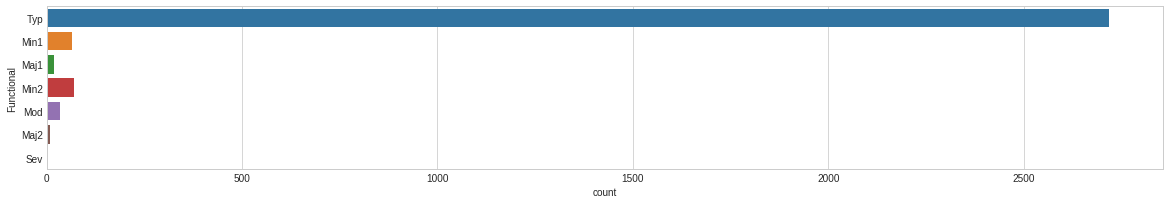

In [129]:
# Feature - Functional
combined['Functional'] = combined['Functional'].fillna(combined['Functional'].mode()[0])
print(combined['Functional'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='Functional', data=combined)

In [0]:
combined.loc[combined['Functional'] == 'Min1', 'Functional'] = 'Minor'
combined.loc[combined['Functional'] == 'Min2', 'Functional'] = 'Minor'
combined.loc[combined['Functional'] == 'Maj1', 'Functional'] = 'Major'
combined.loc[combined['Functional'] == 'Maj2', 'Functional'] = 'Major'

In [0]:
combined_bin['Functional'] = combined['Functional']
combined_con['Functional'] = combined['Functional']

In [132]:
# Feature - Fireplaces
print(combined['Fireplaces'].isnull().sum())

combined_bin['Fireplaces'] = combined['Fireplaces']
combined_con['Fireplaces'] = combined['Fireplaces']

0


In [133]:
# Feature - FireplaceQu
combined['FireplaceQu'] = combined['FireplaceQu'].fillna('NA')
print(combined['FireplaceQu'].isnull().sum())

combined.loc[combined['FireplaceQu'] == 'TA', 'FireplaceQu'] = 'Average'
combined.loc[combined['FireplaceQu'] == 'Fa', 'FireplaceQu'] = 'Average'

0


In [0]:
combined_bin['FireplaceQu'] = combined['FireplaceQu']
combined_con['FireplaceQu'] = combined['FireplaceQu']

In [135]:
# Feature - GarageType
combined['GarageType'] = combined['GarageType'].fillna('NA')
print(combined['GarageType'].isnull().sum())

combined.loc[combined['GarageType'] == 'Basment', 'GarageType'] = 'Basement'
combined.loc[combined['GarageType'] == 'BuiltIn', 'GarageType'] = 'Basement'

0


In [0]:
combined_bin['GarageType'] = combined['GarageType']
combined_con['GarageType'] = combined['GarageType']

In [137]:
# Feature - GarageYrBlt
combined['GarageYrBlt'] = combined['GarageYrBlt'].fillna(combined['GarageYrBlt'].mode()[0])
print(combined['GarageYrBlt'].isnull().sum())

combined_bin['GarageYrBlt'] = pd.cut(combined['GarageYrBlt'], 10)
combined_con['GarageYrBlt'] = combined['GarageYrBlt']

0


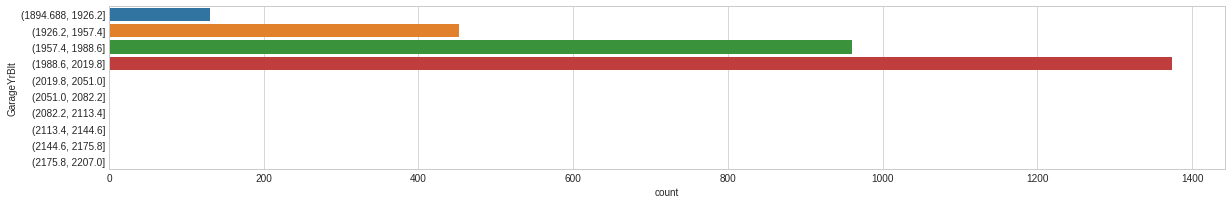

In [138]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='GarageYrBlt', data=combined_bin)

0


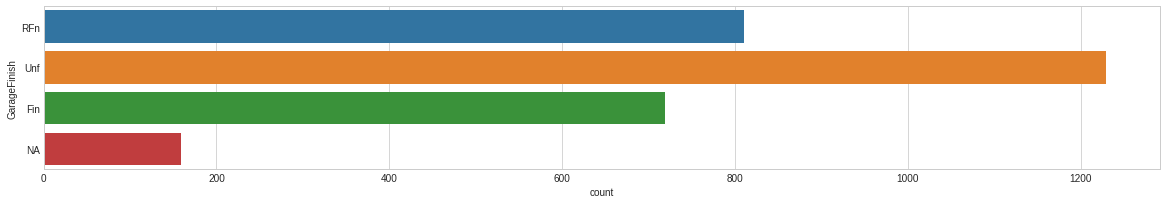

In [139]:
# Feature - GarageFinish
combined['GarageFinish'] = combined['GarageFinish'].fillna('NA')
print(combined['GarageFinish'].isnull().sum())

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3))
sns.countplot(y='GarageFinish', data=combined)

In [0]:
combined_bin['GarageFinish'] = combined['GarageFinish']
combined_con['GarageFinish'] = combined['GarageFinish']

In [141]:
# Feature - GarageCars
combined['GarageCars'] = combined['GarageCars'].fillna(combined['GarageCars'].median())
print(combined['GarageCars'].isnull().sum())

combined_bin['GarageCars'] = combined['GarageCars']
combined_con['GarageCars'] = combined['GarageCars']

0


In [142]:
# Feature - GarageArea
combined['GarageArea'] = combined['GarageArea'].fillna(combined['GarageArea'].median())
print(combined['GarageArea'].isnull().sum())

combined_bin['GarageArea'] = pd.cut(combined['GarageArea'], 10)
combined_con['GarageArea'] = combined['GarageArea']

0


In [143]:
# Feature - GarageQual
combined['GarageQual'] = combined['GarageQual'].fillna('NA')
print(combined['GarageQual'].isnull().sum())

combined_bin['GarageQual'] = combined['GarageQual']
combined_con['GarageQual'] = combined['GarageQual']

0


In [144]:
# Feature - GarageCond
combined['GarageCond'] = combined['GarageCond'].fillna('NA')
print(combined['GarageCond'].isnull().sum())

combined_bin['GarageCond'] = combined['GarageCond']
combined_con['GarageCond'] = combined['GarageCond']

0


In [145]:
# Feature - PavedDrive
print(combined['PavedDrive'].isnull().sum())

combined_bin['PavedDrive'] = combined['PavedDrive']
combined_con['PavedDrive'] = combined['PavedDrive']

0


In [146]:
# Feature - WoodDeckSF
print(combined['WoodDeckSF'].isnull().sum())

combined_bin['WoodDeckSF'] = pd.cut(combined['WoodDeckSF'], 5)
combined_con['WoodDeckSF'] = combined['WoodDeckSF']

0


In [147]:
# Feature - OpenPorchSF
print(combined['OpenPorchSF'].isnull().sum())

combined_bin['OpenPorchSF'] = pd.cut(combined['OpenPorchSF'], 5)
combined_con['OpenPorchSF'] = combined['OpenPorchSF']

0


In [148]:
# Feature - EnclosedPorch
print(combined['EnclosedPorch'].isnull().sum())

combined_bin['EnclosedPorch'] = pd.cut(combined['EnclosedPorch'], 5)
combined_con['EnclosedPorch'] = combined['EnclosedPorch']

0


In [149]:
# Feature - EnclosedPorch
print(combined['3SsnPorch'].isnull().sum())

combined_bin['3SsnPorch'] = pd.cut(combined['3SsnPorch'], 5)
combined_con['3SsnPorch'] = combined['3SsnPorch']

0


In [150]:
# Feature - ScreenPorch
print(combined['ScreenPorch'].isnull().sum())

combined_bin['ScreenPorch'] = pd.cut(combined['ScreenPorch'], 5)
combined_con['ScreenPorch'] = combined['ScreenPorch']

0


In [151]:
# Feature - PoolArea
print(combined['PoolArea'].isnull().sum())

combined_bin['PoolArea'] = pd.cut(combined['PoolArea'], 5)
combined_con['PoolArea'] = combined['PoolArea']

0


In [152]:
# Feature - PoolQC
combined['PoolQC'] = combined['PoolQC'].fillna('NA')
print(combined['PoolQC'].isnull().sum())

combined_bin['PoolQC'] = combined['PoolQC']
combined_con['PoolQC'] = combined['PoolQC']

0


In [153]:
# Feature - Fence
combined['Fence'] = combined['Fence'].fillna('NA')
print(combined['Fence'].isnull().sum())

combined_bin['Fence'] = combined['Fence']
combined_con['Fence'] = combined['Fence']

0


In [154]:
# Feature - MiscFeature
combined['MiscFeature'] = combined['MiscFeature'].fillna('NA')
print(combined['MiscFeature'].isnull().sum())

combined_bin['MiscFeature'] = combined['MiscFeature']
combined_con['MiscFeature'] = combined['MiscFeature']

0


In [155]:
# Feature - MiscVal
print(combined['MiscVal'].isnull().sum())

combined_bin['MiscVal'] = pd.cut(combined['MiscVal'], 10)
combined_con['MiscVal'] = combined['MiscVal']

0


In [156]:
# Feature - MoSold
import calendar
combined['MoSold'] = combined['MoSold'].apply(lambda x: calendar.month_abbr[x])
print(combined['MoSold'].isnull().sum())

combined_bin['MoSold'] = combined['MoSold']
combined_con['MoSold'] = combined['MoSold']

0


In [157]:
# Feature - YrSold
print(combined['YrSold'].isnull().sum())

combined_bin['YrSold'] = pd.cut(combined['YrSold'], 10)
combined_con['YrSold'] = combined['YrSold']

0


In [158]:
# Feature - SaleType
print(combined['SaleType'].isnull().sum())

combined.loc[combined['SaleType'] == 'WD', 'SaleType'] = 'Basement'
combined.loc[combined['SaleType'] == 'CWD', 'SaleType'] = 'Basement'
combined.loc[combined['SaleType'] == 'VWD', 'SaleType'] = 'Basement'
combined.loc[combined['SaleType'] == 'Con', 'SaleType'] = 'Contract'
combined.loc[combined['SaleType'] == 'ConLw', 'SaleType'] = 'Contract'
combined.loc[combined['SaleType'] == 'ConLI', 'SaleType'] = 'Contract'
combined.loc[combined['SaleType'] == 'ConLD', 'SaleType'] = 'Contract'

1


In [0]:
combined['SaleType'] = combined['SaleType'].fillna(combined['SaleType'].mode()[0])

combined_bin['SaleType'] = combined['SaleType']
combined_con['SaleType'] = combined['SaleType']

In [160]:
# Feature - SaleCondition
print(combined['SaleCondition'].isnull().sum())

combined_bin['SaleCondition'] = combined['SaleCondition']
combined_con['SaleCondition'] = combined['SaleCondition']

0


In [161]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [162]:
combined_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null category
LotArea          2919 non-null category
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null int64
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null category
YearRemodAdd     2919 non-null category
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd   

In [163]:
combined_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null int64
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 no

In [0]:
# Feature Encoding

In [165]:
# One hot encoding for binned data
one_hot_cols = combined_bin.columns.tolist()
combined_bin_enc = pd.get_dummies(combined_bin, columns=one_hot_cols)
combined_bin_enc.head()

,MSSubClass_1 Story,MSSubClass_1.5 Story,MSSubClass_2 Story,MSSubClass_2.5 Story,MSSubClass_Duplex,MSSubClass_Split-multilevel,MSZoning_C (all),MSZoning_Residential,MSZoning_Village residencial,"LotFrontage_(20.708, 50.2]","LotFrontage_(50.2, 79.4]","LotFrontage_(79.4, 108.6]","LotFrontage_(108.6, 137.8]","LotFrontage_(137.8, 167.0]","LotFrontage_(167.0, 196.2]","LotFrontage_(196.2, 225.4]","LotFrontage_(225.4, 254.6]","LotFrontage_(254.6, 283.8]","LotFrontage_(283.8, 313.0]","LotArea_(1086.055, 22694.5]","LotArea_(22694.5, 44089.0]","LotArea_(44089.0, 65483.5]","LotArea_(65483.5, 86878.0]","LotArea_(86878.0, 108272.5]","LotArea_(108272.5, 129667.0]","LotArea_(129667.0, 151061.5]","LotArea_(151061.5, 172456.0]","LotArea_(172456.0, 193850.5]","LotArea_(193850.5, 215245.0]",Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_Irregular,LotShape_Regular,LandContour_0,LandContour_1,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Frontage,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Near East-West Railroad,Condition1_Near North-South Railroad,Condition1_Near positive off-site,Condition1_Norm,Condition2_Artery,Condition2_Feedr,Condition2_Near East-West Railroad,Condition2_Near North-South Railroad,Condition2_Near positive off-site,Condition2_Norm,BldgType_1Fam,BldgType_Duplex,BldgType_Townhouse,HouseStyle_1.5 Story,HouseStyle_1Story,HouseStyle_2.5 Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1871.862, 1885.8]","YearBuilt_(1885.8, 1899.6]","YearBuilt_(1899.6, 1913.4]","YearBuilt_(1913.4, 1927.2]","YearBuilt_(1927.2, 1941.0]","YearBuilt_(1941.0, 1954.8]","YearBuilt_(1954.8, 1968.6]","YearBuilt_(1968.6, 1982.4]","YearBuilt_(1982.4, 1996.2]","YearBuilt_(1996.2, 2010.0]","YearRemodAdd_(1949.94, 1960.0]","YearRemodAdd_(1960.0, 1970.0]","YearRemodAdd_(1970.0, 1980.0]",...,"GarageYrBlt_(2113.4, 2144.6]","GarageYrBlt_(2144.6, 2175.8]","GarageYrBlt_(2175.8, 2207.0]",GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,"GarageArea_(-1.488, 148.8]","GarageArea_(148.8, 297.6]","GarageArea_(297.6, 446.4]","GarageArea_(446.4, 595.2]","GarageArea_(595.2, 744.0]","GarageArea_(744.0, 892.8]","GarageArea_(892.8, 1041.6]","GarageArea_(1041.6, 1190.4]","GarageArea_(1190.4, 1339.2]","GarageArea_(1339.2, 1488.0]",GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,"WoodDeckSF_(-1.424, 284.8]","WoodDeckSF_(284.8, 569.6]","WoodDeckSF_(569.6, 854.4]","WoodDeckSF_(854.4, 1139.2]","WoodDeckSF_(1139.2, 1424.0]","OpenPorchSF_(-0.742, 148.4]","OpenPorchSF_(148.4, 296.8]","OpenPorchSF_(296.8, 445.2]","OpenPorchSF_(445.2, 593.6]","OpenPorchSF_(593.6, 742.0]","EnclosedPorch_(-1.012, 202.4]","EnclosedPorch_(202.4, 404.8]","EnclosedPorch_(404.8, 607.2]","EnclosedPorch_(607.2, 809.6]","EnclosedPorch_(809.6, 1012.0]","3SsnPorch_(-0.508, 101.6]","3SsnPorch_(101.6, 203.2]","3SsnPorch_(203.2, 304.8]","3SsnPorch_(304.8, 406.4]"

In [166]:
combined_bin_enc.shape

(2919, 525)

In [167]:
# Label encoding all labels
combined_con_enc = combined_con.apply(LabelEncoder().fit_transform)
combined_con_enc.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2,1,178,619,1,1,1,1,0,3,0,5,5,5,0,3,6,4,110,53,1,1,12,13,0,165,2,4,2,2,4,4,2,513,6,0,107,261,1,0,1,4,197,356,0,766,1,0,2,1,3,1,2,6,4,0,3,1,94,2,2,283,5,5,2,0,52,0,0,0,0,3,4,1,0,3,2,0,4
1,0,1,434,895,1,1,1,1,0,2,0,24,1,5,0,1,5,7,83,26,1,1,8,8,1,0,3,4,1,2,4,1,0,717,6,0,230,604,1,0,1,4,563,0,0,384,0,1,2,0,3,1,3,4,4,1,0,1,67,2,2,202,5,5,2,244,0,0,0,0,0,3,4,1,0,8,1,0,4
2,2,1,252,1266,1,1,0,1,0,3,0,5,5,5,0,3,6,4,108,52,1,1,12,13,0,132,2,4,2,2,4,2,2,333,6,0,366,307,1,0,1,4,254,365,0,821,1,0,2,1,3,1,2,4,4,1,0,1,92,2,2,337,5,5,2,0,33,0,0,0,0,3,4,1,0,11,2,0,4
3,2,1,79,883,1,1,0,1,0,0,0,6,5,5,0,3,6,4,25,20,1,1,13,15,1,0,3,4,0,4,1,4,0,116,6,0,462,181,1,2,1,4,292,283,0,771,1,0,1,0,3,1,2,5,4,1,2,4,89,3,3,366,5,5,2,0,26,160,0,0,0,3,4,1,0,3,0,0,0
4,2,1,471,1670,1,1,0,1,0,2,0,15,5,5,0,3,7,4,107,50,1,1,12,13,0,289,2,4,2,2,4,0,2,470,6,0,419,505,1,0,1,4,462,479,0,1063,1,0,2,1,4,1,2,7,4,1,0,1,91,2,3,495,5,5,2,149,73,0,0,0,0,3,4,1,0,2,2,0,4


In [168]:
combined_con_enc.shape

(2919, 79)

In [0]:
# Selecting combined_con_enc as dataset for prediction
train_con = combined_con_enc.iloc[0:1460,:]
test_con = combined_con_enc.iloc[1460:,:]
target = train['SalePrice']

In [0]:
X_train = train_con
y_train = target
#X_test  = test_con


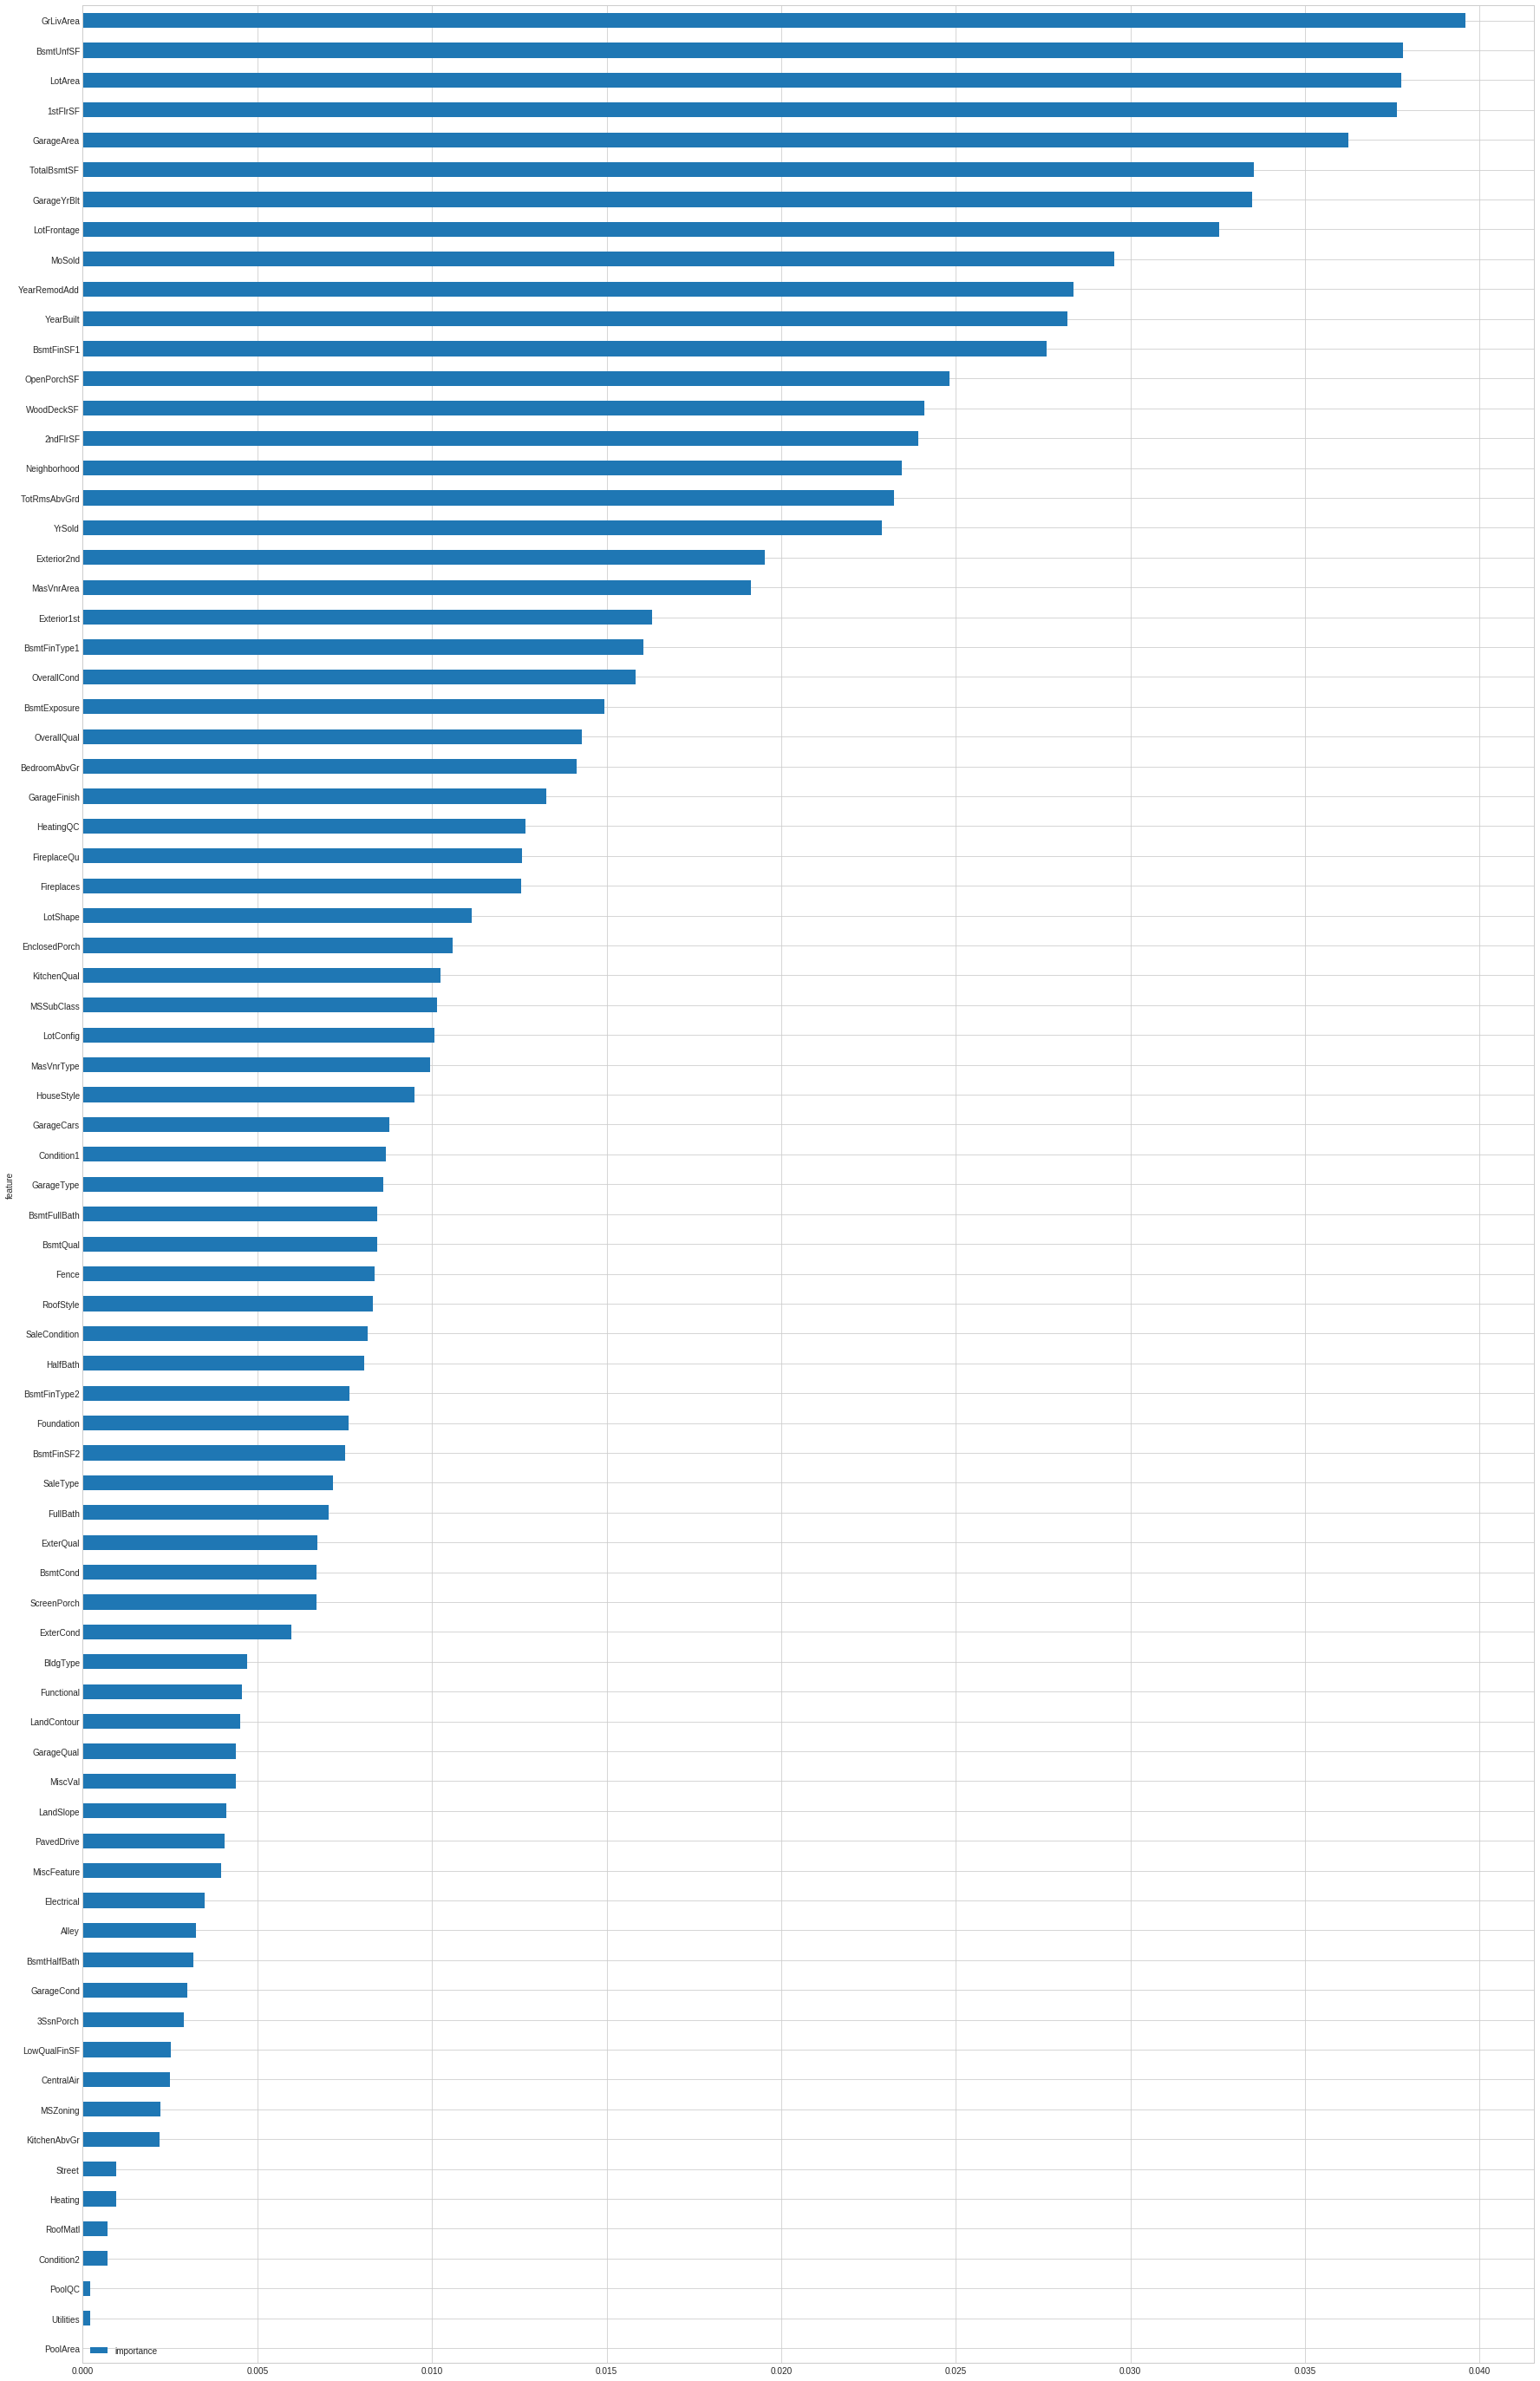

In [171]:
# Check importance of each feature
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(30, 50))

In [0]:
X_train_reduced = train_con[['1stFlrSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','YearBuilt','LotFrontage',
                                     'GarageYrBlt','TotalBsmtSF','MoSold','BsmtFinSF1','OverallQual']]


In [0]:
X_test_reduced = test_con[['1stFlrSF','LotArea','GrLivArea','GarageArea','BsmtUnfSF','YearBuilt','LotFrontage',
                                     'GarageYrBlt','TotalBsmtSF','MoSold','BsmtFinSF1','OverallQual']]

In [174]:
print(X_train_reduced.shape)
print(y_train.shape)
print(X_test_reduced.shape)
y_test = pd.DataFrame(0,index=range(0,1459),columns=['SalePrice'], dtype='int')
print(y_test.shape)
y_test.head

(1460, 12)
(1460,)
(1459, 12)
(1459, 1)


<bound method NDFrame.head of       SalePrice
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
...         ...
1429          0
1430          0
1431          0
1432          0
1433          0
1434          0
1435          0
1436          0
1437          0
1438          0
1439          0
1440          0
1441          0
1442          0
1443          0
1444          0
1445          0
1446          0
1447          0
1448          0
1449          0
1450          0
1451          0
1452          0
1453          0
1454          0
1455          0
1456          0
1457      

In [175]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
# feature extraction
name = []
for i in X_train.columns:
    name.append(i)
k_best = SelectKBest(score_func=f_classif, k=20)
# fit on train set
fit = k_best.fit(X_train, y_train)
# transform train set
univariate_features = fit.get_support()
for i in range(0,len(name)):
    if univariate_features[i]:
        print (name[i]) 
        


MSZoning
Street
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
ExterQual
BsmtQual
BsmtFinSF1
TotalBsmtSF
Heating
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
KitchenQual
TotRmsAbvGrd
GarageCars
GarageArea
SaleType


In [0]:

#print(univariate_features.shape)

#X_train_reduced = pd.DataFrame(data=univariate_features)

#X_train_reduced.head()
'''
# chi2, k=20
X_train_reduced = train_con[[
'LotFrontage',
'LotArea',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'MiscVal']]

# f_regression data, k=20
X_train_reduced = train_con[[
'LotFrontage',
'LotArea',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'ExterQual',
'BsmtQual',
'TotalBsmtSF',
'HeatingQC',
'1stFlrSF',
'GrLivArea',
'FullBath',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageType',
'GarageFinish',
'GarageCars',
'GarageArea']]

# below is from f_assignf, k=30
X_train_reduced = train_con[['MSZoning',
'LotFrontage',
'LotArea',
'Street',
'LotShape',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'ExterQual',
'Foundation',
'BsmtQual',
'BsmtFinSF1',
'TotalBsmtSF',
'Heating',
'CentralAir',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'FullBath',
'HalfBath',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageCars',
'GarageArea',
'SaleType']]
'''
#below is f_assignf, k=20
X_train_reduced = train_con[['MSZoning','Street','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','BsmtQual',
                           'BsmtFinSF1','TotalBsmtSF','Heating','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual',
                           'TotRmsAbvGrd','GarageCars','GarageArea','SaleType']]



In [177]:
X_train_reduced.shape

(1460, 20)

In [0]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [179]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]
              }

rfc = RandomForestRegressor(n_estimators=50)

n_iter_search = 10

random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

random_search.fit(X_train_reduced, y_train)
#random_search.fit(train_con, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.849 (std: 0.020)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.848 (std: 0.024)
Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.846 (std: 0.026)
Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 13}

Model with rank: 4
Mean validation score: 0.842 (std: 0.028)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 18}

Model with rank: 5
Mean validation score: 0.841 (std: 0.023)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 19}



In [0]:
#rfc_tuned = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='entropy',max_depth=10,
#                                   max_features=10,min_samples_split=17)

rfc_tuned = RandomForestRegressor(n_estimators=50, bootstrap=False, max_depth=None, max_features=9,
                                   min_samples_leaf=4, min_samples_split=7)

#train_pred_tuned = model_selection.cross_val_predict(rfc_tuned, 
#                                                  X_train_reduced, 
#                                                  y_train, 
#                                                  cv=10, 
#                                                  n_jobs = -1)
#acc_cv = round(metrics.accuracy_score(y_train, train_pred_tuned) * 100, 2)
#print(acc_cv)

In [181]:
X_test_reduced = test_con[['MSZoning','Street','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','BsmtQual',
                           'BsmtFinSF1','TotalBsmtSF','Heating','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual',
                           'TotRmsAbvGrd','GarageCars','GarageArea','SaleType']]
'''
X_test_reduced = test_con[[
'LotFrontage',
'LotArea',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'MiscVal']]

X_test_reduced = test_con[[
'LotFrontage',
'LotArea',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'ExterQual',
'BsmtQual',
'TotalBsmtSF',
'HeatingQC',
'1stFlrSF',
'GrLivArea',
'FullBath',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageType',
'GarageFinish',
'GarageCars',
'GarageArea']]

X_test_reduced = test_con[['MSZoning',
'LotFrontage',
'LotArea',
'Street',
'LotShape',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'ExterQual',
'Foundation',
'BsmtQual',
'BsmtFinSF1',
'TotalBsmtSF',
'Heating',
'CentralAir',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'FullBath',
'HalfBath',
'KitchenQual',
'TotRmsAbvGrd',
'Fireplaces',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageCars',
'GarageArea',
'SaleType']]
'''
#model = rfc.fit(X_train_reduced,y_train)
#test_pred = model.predict(X_test_reduced)

model = rfc_tuned.fit(train_con,y_train)
test_pred = model.predict(test_con)

print(test_pred.shape)
#test_pred.head(10)

(1459,)


In [182]:
result = pd.DataFrame(data=test_pred)

result.head()

,0
0,128074.237143
1,149548.210714
2,182623.135619
3,185903.286810
4,193321.336762


In [0]:
#df_output = pd.DataFrame()
#aux = pd.read_csv('test.csv')
#df_output['Id'] = aux['Id']
#df_output['SalePrice'] = test_pred
#df_output[['Id', 'SalePrice']].to_csv('submission_8_july_RandomForestRegressor_KBest_none_rfr_tuned.csv', index=False)

In [184]:
'''
X_train_bin_reduced = train_bin[[
'LotFrontage_(167.0, 196.2]',
'LotFrontage_(254.6, 283.8]',
'LotArea_(151061.5, 172456.0]',
'LotArea_(193850.5, 215245.0]',
'Neighborhood_NoRidge',
'Neighborhood_NridgHt',
'OverallQual_1',
'OverallQual_2',
'OverallQual_9',
'OverallQual_10',
'OverallCond_1',
'Exterior1st_ImStucc',
'Exterior2nd_Other',
'MasVnrArea_(800.0, 960.0]',
'MasVnrArea_(960.0, 1120.0]',
'MasVnrArea_(1280.0, 1440.0]',
'ExterQual_Ex',
'ExterCond_Po',
'BsmtQual_Ex',
'BsmtCond_Po',
'BsmtFinSF1_(1693.2, 2257.6]',
'BsmtFinSF1_(2257.6, 2822.0]',
'BsmtFinSF2_(1373.4, 1526.0]',
'BsmtUnfSF_(1868.8, 2102.4]',
'BsmtUnfSF_(2102.4, 2336.0]',
'TotalBsmtSF_(1833.0, 2444.0]',
'TotalBsmtSF_(2444.0, 3055.0]',
'TotalBsmtSF_(3055.0, 3666.0]',
'Heating_Floor',
'1stFlrSF_(2238.4, 2714.5]',
'1stFlrSF_(2714.5, 3190.6]',
'1stFlrSF_(3190.6, 3666.7]',
'2ndFlrSF_(1445.5, 1652.0]',
'2ndFlrSF_(1652.0, 1858.5]',
'2ndFlrSF_(1858.5, 2065.0]',
'LowQualFinSF_(532.0, 638.4]',
'GrLivArea_(3518.8, 4049.6]',
'GrLivArea_(4049.6, 4580.4]',
'GrLivArea_(4580.4, 5111.2]',
'KitchenQual_Ex',
'TotRmsAbvGrd_2',
'FireplaceQu_Ex',
'GarageCars_3.0',
'GarageArea_(744.0, 892.8]',
'GarageArea_(1041.6, 1190.4]',
'WoodDeckSF_(569.6, 854.4]',
'MiscVal_(15300.0, 17000.0]',
'SaleType_New',
'SaleCondition_Alloca',
'SaleCondition_Partial']]

#f_classif, k=30
X_train_bin_reduced = train_bin[['LotArea_(193850.5, 215245.0]',
'OverallQual_1',
'OverallQual_9',
'OverallQual_10',
'OverallCond_1',
'Exterior1st_ImStucc',
'Exterior2nd_Other',
'MasVnrArea_(960.0, 1120.0]',
'MasVnrArea_(1280.0, 1440.0]',
'ExterQual_Ex',
'ExterCond_Po',
'BsmtFinSF1_(2257.6, 2822.0]',
'BsmtFinSF2_(1373.4, 1526.0]',
'BsmtUnfSF_(1868.8, 2102.4]',
'BsmtUnfSF_(2102.4, 2336.0]',
'TotalBsmtSF_(1833.0, 2444.0]',
'TotalBsmtSF_(3055.0, 3666.0]',
'Heating_Floor',
'1stFlrSF_(2238.4, 2714.5]',
'1stFlrSF_(3190.6, 3666.7]',
'2ndFlrSF_(1652.0, 1858.5]',
'2ndFlrSF_(1858.5, 2065.0]',
'LowQualFinSF_(532.0, 638.4]',
'GrLivArea_(3518.8, 4049.6]',
'GrLivArea_(4049.6, 4580.4]',
'GrLivArea_(4580.4, 5111.2]',
'TotRmsAbvGrd_2',
'GarageArea_(1041.6, 1190.4]',
'MiscVal_(15300.0, 17000.0]',
'SaleCondition_Alloca']]


X_train_bin_reduced.shape
'''

"\nX_train_bin_reduced = train_bin[[\n'LotFrontage_(167.0, 196.2]',\n'LotFrontage_(254.6, 283.8]',\n'LotArea_(151061.5, 172456.0]',\n'LotArea_(193850.5, 215245.0]',\n'Neighborhood_NoRidge',\n'Neighborhood_NridgHt',\n'OverallQual_1',\n'OverallQual_2',\n'OverallQual_9',\n'OverallQual_10',\n'OverallCond_1',\n'Exterior1st_ImStucc',\n'Exterior2nd_Other',\n'MasVnrArea_(800.0, 960.0]',\n'MasVnrArea_(960.0, 1120.0]',\n'MasVnrArea_(1280.0, 1440.0]',\n'ExterQual_Ex',\n'ExterCond_Po',\n'BsmtQual_Ex',\n'BsmtCond_Po',\n'BsmtFinSF1_(1693.2, 2257.6]',\n'BsmtFinSF1_(2257.6, 2822.0]',\n'BsmtFinSF2_(1373.4, 1526.0]',\n'BsmtUnfSF_(1868.8, 2102.4]',\n'BsmtUnfSF_(2102.4, 2336.0]',\n'TotalBsmtSF_(1833.0, 2444.0]',\n'TotalBsmtSF_(2444.0, 3055.0]',\n'TotalBsmtSF_(3055.0, 3666.0]',\n'Heating_Floor',\n'1stFlrSF_(2238.4, 2714.5]',\n'1stFlrSF_(2714.5, 3190.6]',\n'1stFlrSF_(3190.6, 3666.7]',\n'2ndFlrSF_(1445.5, 1652.0]',\n'2ndFlrSF_(1652.0, 1858.5]',\n'2ndFlrSF_(1858.5, 2065.0]',\n'LowQualFinSF_(532.0, 638.4]',\n'

In [185]:
'''
X_test_bin_reduced = test_bin[[
'LotFrontage_(167.0, 196.2]',
'LotFrontage_(254.6, 283.8]',
'LotArea_(151061.5, 172456.0]',
'LotArea_(193850.5, 215245.0]',
'Neighborhood_NoRidge',
'Neighborhood_NridgHt',
'OverallQual_1',
'OverallQual_2',
'OverallQual_9',
'OverallQual_10',
'OverallCond_1',
'Exterior1st_ImStucc',
'Exterior2nd_Other',
'MasVnrArea_(800.0, 960.0]',
'MasVnrArea_(960.0, 1120.0]',
'MasVnrArea_(1280.0, 1440.0]',
'ExterQual_Ex',
'ExterCond_Po',
'BsmtQual_Ex',
'BsmtCond_Po',
'BsmtFinSF1_(1693.2, 2257.6]',
'BsmtFinSF1_(2257.6, 2822.0]',
'BsmtFinSF2_(1373.4, 1526.0]',
'BsmtUnfSF_(1868.8, 2102.4]',
'BsmtUnfSF_(2102.4, 2336.0]',
'TotalBsmtSF_(1833.0, 2444.0]',
'TotalBsmtSF_(2444.0, 3055.0]',
'TotalBsmtSF_(3055.0, 3666.0]',
'Heating_Floor',
'1stFlrSF_(2238.4, 2714.5]',
'1stFlrSF_(2714.5, 3190.6]',
'1stFlrSF_(3190.6, 3666.7]',
'2ndFlrSF_(1445.5, 1652.0]',
'2ndFlrSF_(1652.0, 1858.5]',
'2ndFlrSF_(1858.5, 2065.0]',
'LowQualFinSF_(532.0, 638.4]',
'GrLivArea_(3518.8, 4049.6]',
'GrLivArea_(4049.6, 4580.4]',
'GrLivArea_(4580.4, 5111.2]',
'KitchenQual_Ex',
'TotRmsAbvGrd_2',
'FireplaceQu_Ex',
'GarageCars_3.0',
'GarageArea_(744.0, 892.8]',
'GarageArea_(1041.6, 1190.4]',
'WoodDeckSF_(569.6, 854.4]',
'MiscVal_(15300.0, 17000.0]',
'SaleType_New',
'SaleCondition_Alloca',
'SaleCondition_Partial']]



X_test_bin_reduced = test_bin[['LotArea_(193850.5, 215245.0]',
'OverallQual_1',
'OverallQual_9',
'OverallQual_10',
'OverallCond_1',
'Exterior1st_ImStucc',
'Exterior2nd_Other',
'MasVnrArea_(960.0, 1120.0]',
'MasVnrArea_(1280.0, 1440.0]',
'ExterQual_Ex',
'ExterCond_Po',
'BsmtFinSF1_(2257.6, 2822.0]',
'BsmtFinSF2_(1373.4, 1526.0]',
'BsmtUnfSF_(1868.8, 2102.4]',
'BsmtUnfSF_(2102.4, 2336.0]',
'TotalBsmtSF_(1833.0, 2444.0]',
'TotalBsmtSF_(3055.0, 3666.0]',
'Heating_Floor',
'1stFlrSF_(2238.4, 2714.5]',
'1stFlrSF_(3190.6, 3666.7]',
'2ndFlrSF_(1652.0, 1858.5]',
'2ndFlrSF_(1858.5, 2065.0]',
'LowQualFinSF_(532.0, 638.4]',
'GrLivArea_(3518.8, 4049.6]',
'GrLivArea_(4049.6, 4580.4]',
'GrLivArea_(4580.4, 5111.2]',
'TotRmsAbvGrd_2',
'GarageArea_(1041.6, 1190.4]',
'MiscVal_(15300.0, 17000.0]',
'SaleCondition_Alloca']]
'''

"\nX_test_bin_reduced = test_bin[[\n'LotFrontage_(167.0, 196.2]',\n'LotFrontage_(254.6, 283.8]',\n'LotArea_(151061.5, 172456.0]',\n'LotArea_(193850.5, 215245.0]',\n'Neighborhood_NoRidge',\n'Neighborhood_NridgHt',\n'OverallQual_1',\n'OverallQual_2',\n'OverallQual_9',\n'OverallQual_10',\n'OverallCond_1',\n'Exterior1st_ImStucc',\n'Exterior2nd_Other',\n'MasVnrArea_(800.0, 960.0]',\n'MasVnrArea_(960.0, 1120.0]',\n'MasVnrArea_(1280.0, 1440.0]',\n'ExterQual_Ex',\n'ExterCond_Po',\n'BsmtQual_Ex',\n'BsmtCond_Po',\n'BsmtFinSF1_(1693.2, 2257.6]',\n'BsmtFinSF1_(2257.6, 2822.0]',\n'BsmtFinSF2_(1373.4, 1526.0]',\n'BsmtUnfSF_(1868.8, 2102.4]',\n'BsmtUnfSF_(2102.4, 2336.0]',\n'TotalBsmtSF_(1833.0, 2444.0]',\n'TotalBsmtSF_(2444.0, 3055.0]',\n'TotalBsmtSF_(3055.0, 3666.0]',\n'Heating_Floor',\n'1stFlrSF_(2238.4, 2714.5]',\n'1stFlrSF_(2714.5, 3190.6]',\n'1stFlrSF_(3190.6, 3666.7]',\n'2ndFlrSF_(1445.5, 1652.0]',\n'2ndFlrSF_(1652.0, 1858.5]',\n'2ndFlrSF_(1858.5, 2065.0]',\n'LowQualFinSF_(532.0, 638.4]',\n'Gr

In [0]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsRegression, 
                          GaussianNB, 
                          DecisionTreeRegression, 
                          RandomForestRegression,
                          GradientBoostingRegression))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [190]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
'''
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train_reduced, target)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)
'''

'\n# Specify parameters and distributions to sample from\nparam_dist = {\'penalty\': [\'l2\', \'l1\'], \n                         \'class_weight\': [None, \'balanced\'],\n                         \'C\': np.logspace(-20, 20, 10000), \n                         \'intercept_scaling\': np.logspace(-20, 20, 10000)}\n\n# Run Randomized Search\nn_iter_search = 10\nlrc = LogisticRegression()\nrandom_search = RandomizedSearchCV(lrc, \n                                   n_jobs=-1, \n                                   param_distributions=param_dist, \n                                   n_iter=n_iter_search)\n\nstart = time.time()\nrandom_search.fit(X_train_reduced, target)\nprint("RandomizedSearchCV took %.2f seconds for %d candidates"\n      " parameter settings." % ((time.time() - start), n_iter_search))\nreport(random_search.cv_results_)\n'

In [191]:
model = lrc.fit(X_train_reduced,target)
test_pred = model.predict(X_test_reduced)

NameError: ignored

In [0]:
result = pd.DataFrame(data=test_pred)

result.head()

df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['Id'] = aux['Id']
df_output['SalePrice'] = test_pred
df_output[['Id', 'SalePrice']].to_csv('submission_8_july_LogisticRegression.csv', index=False)

In [0]:
result.head()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
import datetime

# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train_reduced, 
                                                                                                 target, 
                                                                                                 X_test_reduced, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

In [0]:
result = pd.DataFrame(data=test_pred_knn)

result.head()

df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['Id'] = aux['Id']
df_output['SalePrice'] = test_pred_knn
df_output[['Id', 'SalePrice']].to_csv('submission_8_july_KNeighborsClassifier.csv', index=False)

In [0]:
result.head()

In [0]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestRegression(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17,  
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))